In [550]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from matplotlib.animation import PillowWriter

# 데이터 불러오기

### AI hub 에서 제공한 train,test csv 파일에서 target 데이터의 분포가 맞지 않아 병합 후 사용하도록 하겠습니다.

In [551]:
warnings.filterwarnings(action = 'ignore')
plt.style.use('ggplot')
plt.rc('font',family = 'malgun gothic')
plt.rc('axes',unicode_minus = False)

In [552]:
train = pd.read_csv('https://raw.githubusercontent.com/yonghyeun/Dementia_Analysis/main/data/train.csv').drop('EMAIL',axis = 1)
test = pd.read_csv('https://raw.githubusercontent.com/yonghyeun/Dementia_Analysis/main/data/test.csv').drop('EMAIL',axis = 1)

df = pd.concat([train,test],axis = 0)

In [553]:
X = df.drop('target',axis = 1)
Y = df['target']

x_train, x_test, y_train,y_test = train_test_split(X,Y,random_state = 42, test_size = 0.2, stratify = Y)

In [554]:
x_train['target'] = y_train
x_test['target'] = y_test

df = x_train.copy().reset_index(drop = True)
test = x_test.copy().reset_index(drop = True)

# 데이터 분포 확인하기 

Text(0.5, 1.0, 'Target 데이터의 도수 분포표')

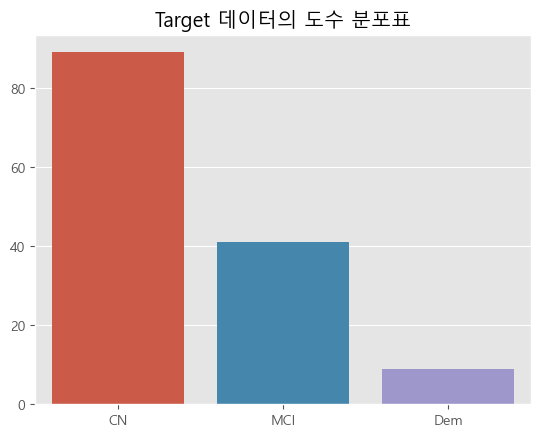

In [625]:
sns.countplot(data = df,
                x = 'target')
plt.xlabel('')
plt.ylabel('')

plt.title('Target 데이터의 도수 분포표')

* 기본적으로 데이터간의 불균형이 존재합니다.

# Cross table 생성하기

In [555]:
activity_cols = ['activity_average_met', 'activity_cal_active', 'activity_cal_total',
       'activity_daily_movement', 'activity_high', 'activity_inactive',
       'activity_inactivity_alerts', 'activity_low', 'activity_medium',
       'activity_met_min_high', 'activity_met_min_inactive',
       'activity_met_min_low', 'activity_met_min_medium', 'activity_non_wear',
       'activity_rest', 'activity_score', 'activity_score_meet_daily_targets',
       'activity_score_move_every_hour', 'activity_score_recovery_time',
       'activity_score_stay_active', 'activity_score_training_frequency',
       'activity_score_training_volume', 'activity_steps', 'activity_total','target']

sleep_cols = ['sleep_awake', 'sleep_breath_average', 'sleep_deep', 'sleep_duration',
       'sleep_efficiency', 'sleep_hr_average', 'sleep_hr_lowest', 'sleep_light', 
       'sleep_midpoint_at_delta','sleep_midpoint_time', 'sleep_onset_latency', 'sleep_period_id',
       'sleep_rem', 'sleep_restless', 'sleep_rmssd', 'sleep_score',
       'sleep_score_alignment', 'sleep_score_deep', 'sleep_score_disturbances',
       'sleep_score_efficiency', 'sleep_score_latency', 'sleep_score_rem',
       'sleep_score_total', 'sleep_temperature_delta',
       'sleep_temperature_deviation', 'sleep_total','target']

In [556]:
def cross_tab(df):
    
    mean_ctab = round(df.groupby('target').mean(),2).astype(str)
    
    sd_ctab = round(df.groupby('target').std(),2).astype(str)
    
    result = mean_ctab + ' (±' + sd_ctab + ')'
    
    return result.T

In [557]:
activity_ctab = cross_tab(df[activity_cols])
sleep_ctab = cross_tab(df[sleep_cols])

In [558]:
display(activity_ctab)
print('**'* 40)
display(sleep_ctab)

target,CN,Dem,MCI
activity_average_met,1.48 (±0.13),1.29 (±0.1),1.49 (±0.14)
activity_cal_active,481.06 (±193.43),256.72 (±140.67),498.22 (±207.1)
activity_cal_total,2526.92 (±266.07),2240.84 (±170.37),2560.97 (±243.1)
activity_daily_movement,9089.44 (±3677.35),4674.78 (±2664.08),9353.74 (±4062.57)
activity_high,3.55 (±5.86),0.84 (±1.37),3.62 (±6.53)
activity_inactive,516.66 (±89.53),540.58 (±115.33),510.16 (±109.6)
activity_inactivity_alerts,0.52 (±0.44),0.64 (±0.55),0.4 (±0.31)
activity_low,289.75 (±82.97),166.87 (±75.66),295.37 (±91.23)
activity_medium,52.54 (±28.19),30.3 (±26.27),58.24 (±38.38)
activity_met_min_high,24.86 (±42.18),6.37 (±10.51),24.21 (±41.68)


********************************************************************************


target,CN,Dem,MCI
sleep_awake,5260.04 (±1700.35),7576.19 (±3311.8),5807.98 (±1649.19)
sleep_breath_average,16.7 (±1.12),16.45 (±0.92),16.82 (±1.0)
sleep_deep,5239.77 (±2002.79),4356.99 (±1871.28),5027.01 (±1937.13)
sleep_duration,28702.54 (±3776.91),34950.81 (±5112.72),28702.74 (±3419.8)
sleep_efficiency,82.28 (±4.9),79.39 (±7.51),80.3 (±5.53)
sleep_hr_average,60.58 (±6.63),58.6 (±6.64),59.94 (±6.66)
sleep_hr_lowest,55.15 (±5.93),52.68 (±6.23),54.8 (±6.23)
sleep_light,14407.68 (±2587.89),18993.43 (±2803.44),14456.01 (±2591.14)
sleep_midpoint_at_delta,11280.48 (±6701.95),16732.37 (±15745.66),10229.5 (±5763.09)
sleep_midpoint_time,14434.61 (±2017.33),17570.04 (±2775.41),14381.85 (±1679.34)


# 통계적 가설검정

### ANOVA TEST

In [559]:
def anova_test(df):
    
    selector = SelectKBest(score_func = f_classif)
    
    X = df.drop('target',axis = 1)
    Y = df['target']
    
    selector.fit(X,Y)
    
    result = pd.DataFrame({'F-statics':selector.scores_,
                            'p-value':selector.pvalues_}, index = selector.feature_names_in_).sort_values(by = 'p-value')
    
    
    return result 

In [560]:
activity_anova = anova_test(df[activity_cols])
sleep_anova = anova_test(df[sleep_cols])

In [561]:
def merge_ctab_anova(ctab,anova):
    
    result = pd.merge(ctab,anova,left_index = True, right_index = True).sort_values(by = 'p-value')
    
    result = result[['CN','MCI','Dem','F-statics','p-value']]
    
    return result

In [562]:
activity_result = merge_ctab_anova(activity_ctab,activity_anova)
sleep_result = merge_ctab_anova(sleep_ctab,sleep_anova)

In [563]:
display(activity_result)
print('**'*50)
display(sleep_result)

,CN,MCI,Dem,F-statics,p-value
activity_score_meet_daily_targets,77.0 (±25.97),79.7 (±22.05),32.1 (±24.96),14.468764,0.000002
activity_rest,524.21 (±87.15),516.05 (±70.33),656.32 (±91.97),11.253629,0.000030
activity_score,82.84 (±9.86),83.74 (±10.11),66.92 (±14.73),10.560889,0.000055
activity_score_training_volume,88.98 (±14.18),89.37 (±15.26),63.8 (±31.14),10.551542,0.000055
activity_total,345.84 (±97.65),357.24 (±107.1),198.02 (±88.11),9.831410,0.000103
activity_low,289.75 (±82.97),295.37 (±91.23),166.87 (±75.66),9.094259,0.000196
activity_met_min_low,200.57 (±68.23),198.64 (±67.47),102.39 (±44.39),8.981034,0.000217
activity_average_met,1.48 (±0.13),1.49 (±0.14),1.29 (±0.1),8.921199,0.000229
activity_steps,10896.37 (±3879.29),11533.6 (±4762.84),6125.17 (±3297.73),6.437075,0.002133
activity_daily_movement,9089.44 (±3677.35),9353.74 (±4062.57),4674.78 (±2664.08),6.142558,0.002793


****************************************************************************************************


,CN,MCI,Dem,F-statics,p-value
sleep_light,14407.68 (±2587.89),14456.01 (±2591.14),18993.43 (±2803.44),12.990114,0.000007
sleep_duration,28702.54 (±3776.91),28702.74 (±3419.8),34950.81 (±5112.72),11.564572,0.000023
sleep_midpoint_time,14434.61 (±2017.33),14381.85 (±1679.34),17570.04 (±2775.41),10.688365,0.000049
sleep_score_latency,79.87 (±3.9),80.18 (±3.28),74.28 (±6.24),8.959065,0.000221
sleep_total,23442.49 (±3162.67),22894.77 (±3213.02),27374.62 (±3580.59),7.320295,0.000956
sleep_awake,5260.04 (±1700.35),5807.98 (±1649.19),7576.19 (±3311.8),7.101472,0.001165
sleep_onset_latency,714.2 (±205.61),667.37 (±160.29),958.36 (±461.19),6.598883,0.001840
sleep_restless,35.38 (±9.33),36.15 (±10.06),45.6 (±10.27),4.634888,0.011291
sleep_score_total,70.95 (±12.16),69.14 (±12.37),81.66 (±11.29),3.929183,0.021931
sleep_score_alignment,90.08 (±11.66),94.43 (±6.01),86.51 (±16.75),3.195057,0.044057


<aside>
💡 INSIGHT

1. 세 그룹간 유의미한 차이가 있던 변수는 다음과 같았습니다.

- 하루 휴식 시간
- 활동 목표 달성 점수
- 활동 점수
- 저강도 운동 시간

2. 비 치매군 (CN) 과 경도 인지 장애군(MCI)의 독립 변수간의 차이는 크게 나지 않았습니다. 위 4가지의 변수들은 치매군(Dem) 와 다른 환자 군간 차이가 유의미하게 나타났습니다.

 MCI 군과 Dem 군을 합쳐 하나의 치매 군으로 보고 T-test 검정을 시행한다면 유의미한 차이가 나는 변수들은 달라질 것 같습니다.

 두 변수를 합쳐야 할지 말아야 할지 고민을 해봐야겠습니다.

</aside>

<aside>
💡 INSIGHT

1. 세 그룹간 유의미한 차이가 있던 변수는 다음과 같았습니다.

- 가벼운 수면 시간
- 수면 잠복 점수
- 수면 중간점 시간
- 수면 시간 
- 수면 잠복 시간 
- 뒤척임 비율
- 수면 시기 점수 
- 수면 시간 
- 깊은 수면 점수 
- 깬 시간

2. 수면 양상 데이터에서는 활동 내역 데이터와 다르게 세 그룹간의 차이가 나타났습니다.
대부분 부정적인 양상은 Dem → MCI → CN 군, 긍정적인 양상은 CN →MCI → Dem 순으로 나타났습니다. 

 하지만 anova test 에서는 각 그룹 간의 차이가 있다 정도만 알 수 있을 뿐 제대로 된 통계 검정을 위해서는 다른 절차가 필요 할 것입니다.

</aside>

In [564]:
activity_pvalue = activity_result[activity_result['p-value'] < 0.05]
sleep_pvalue = sleep_result[sleep_result['p-value'] < 0.05]

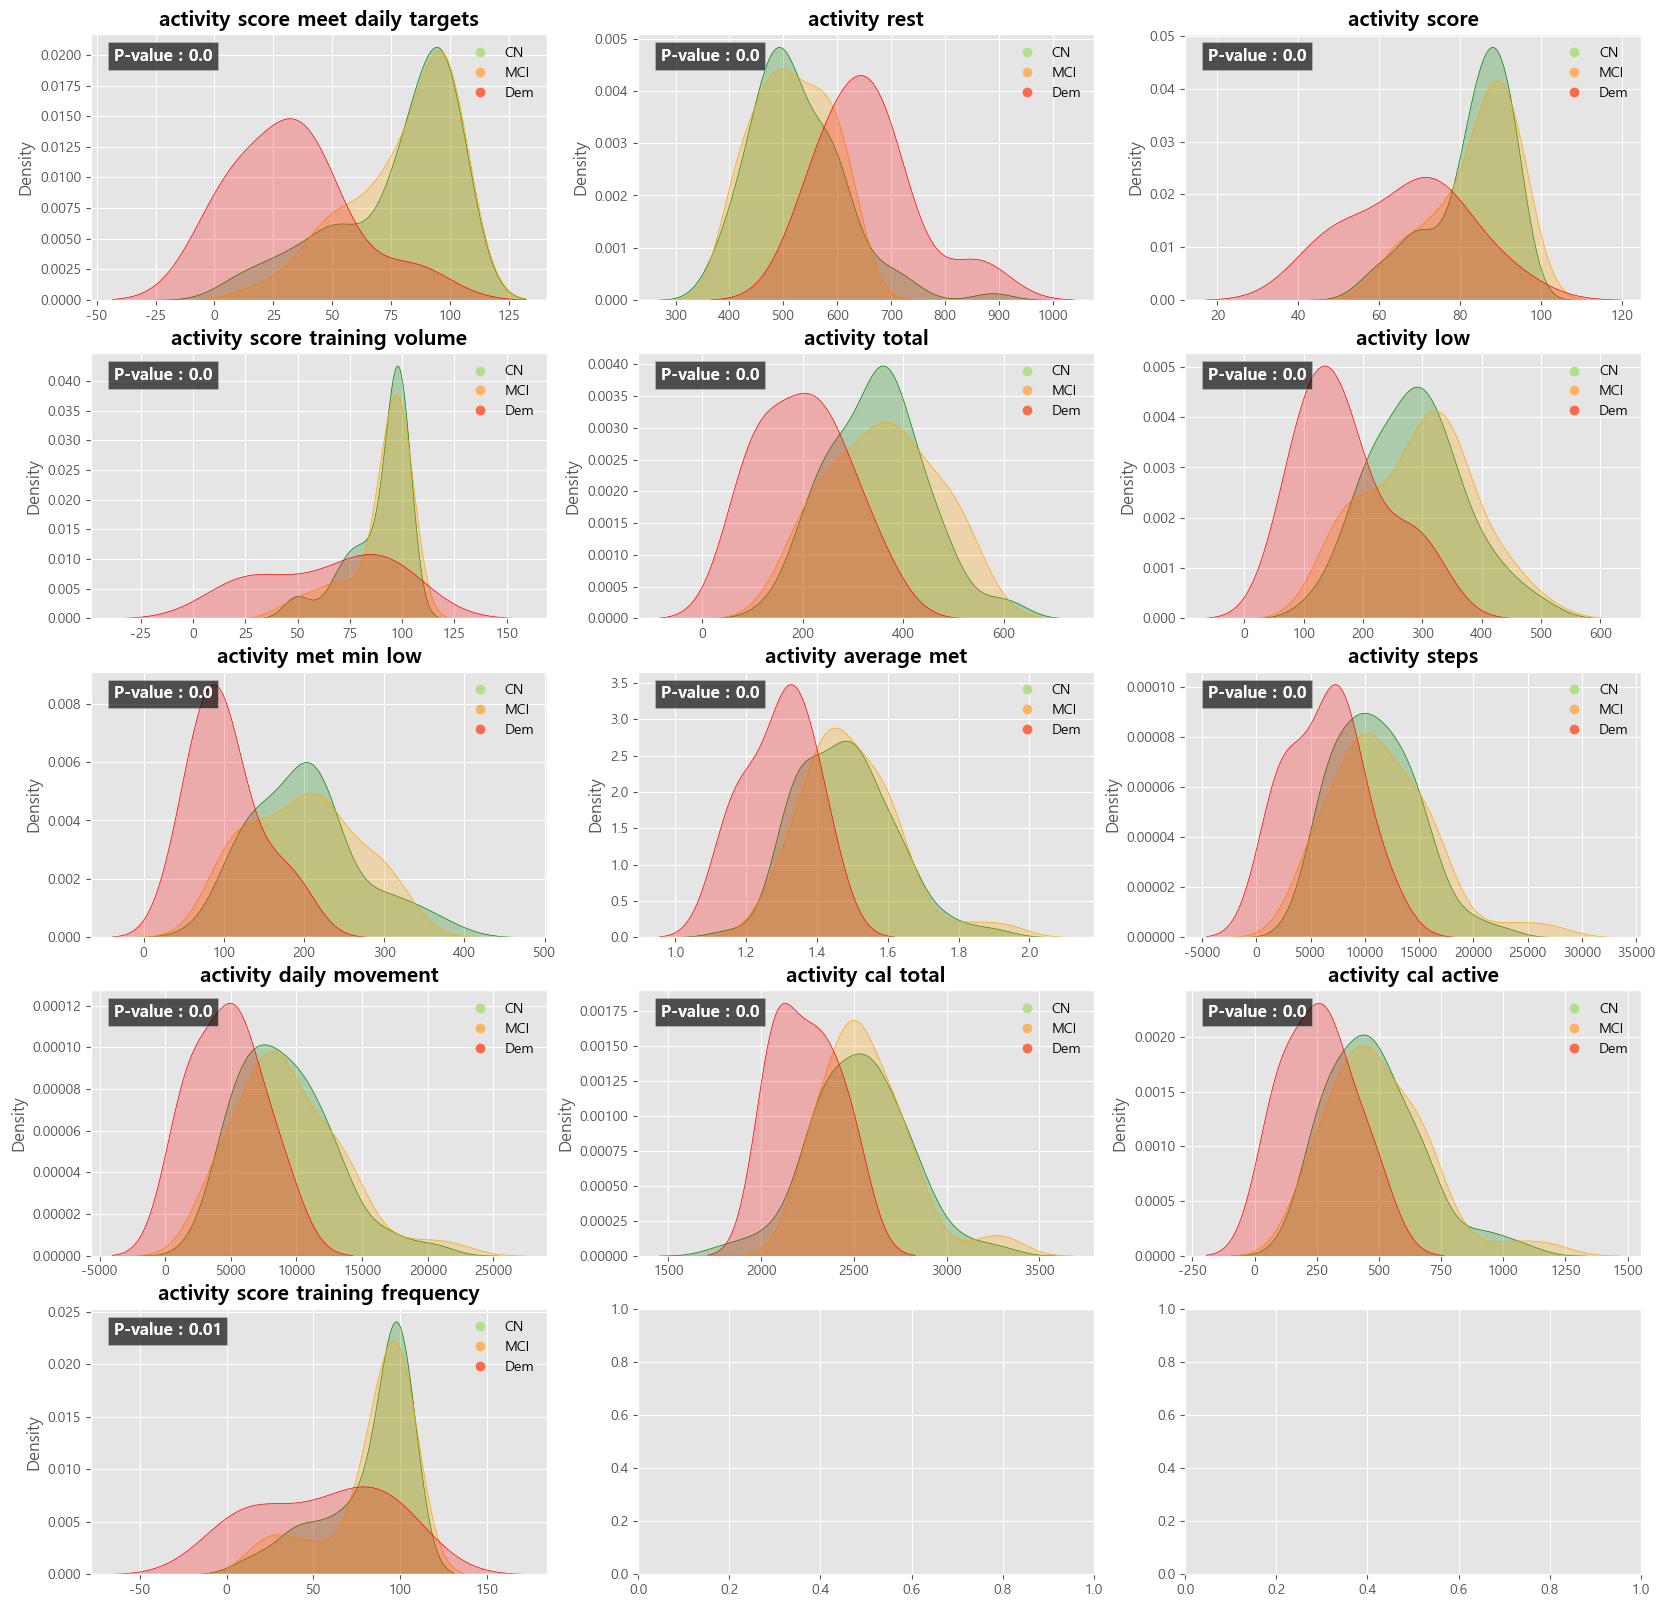

In [565]:
fig,ax = plt.subplots(ncols = 3,nrows = 5, figsize = (20,20))

target_colors = {'CN':'#b2df8a','MCI':'#fdb462','Dem':'#fb6a4a'}

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]

ax = ax.flatten()

colors = ['green','orange','red']

p_value = activity_pvalue['p-value'].values
cols = activity_pvalue.index

for i,col in enumerate(cols):
    for num,target in enumerate(['CN','MCI','Dem']):
        
        
        p = round(p_value[i],2)

        sns.kdeplot(data = df[df['target'] == target],
                    x = col,
                    ax = ax[i],
                    fill = True,
                    color = colors[num])
        ax[i].set_xlabel('')
        ax[i].set_title(col.replace('_',' '), fontsize = 15, weight = 'bold')
        ax[i].legend(handles = legend_elements,
                    frameon = False,
                    loc = 'upper right')
        # add text to ax
        ax[i].text(0.05, 0.9, f'P-value : {p}', transform=ax[i].transAxes, fontsize=12, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.3))

<aside>
💡 INSIGHT

 **치매군 환자**들이 **비 치매군**과 **경도 인지 장애군**에 비해 휴식 시간이 많았고, 하루 활동 점수 및 저강도 운동 시간이 매우 낮았습니다.

 **비 치매군**과 **경도 인지 장애군**간의 평균적인 차이는 보이지 않습니다.

</aside>

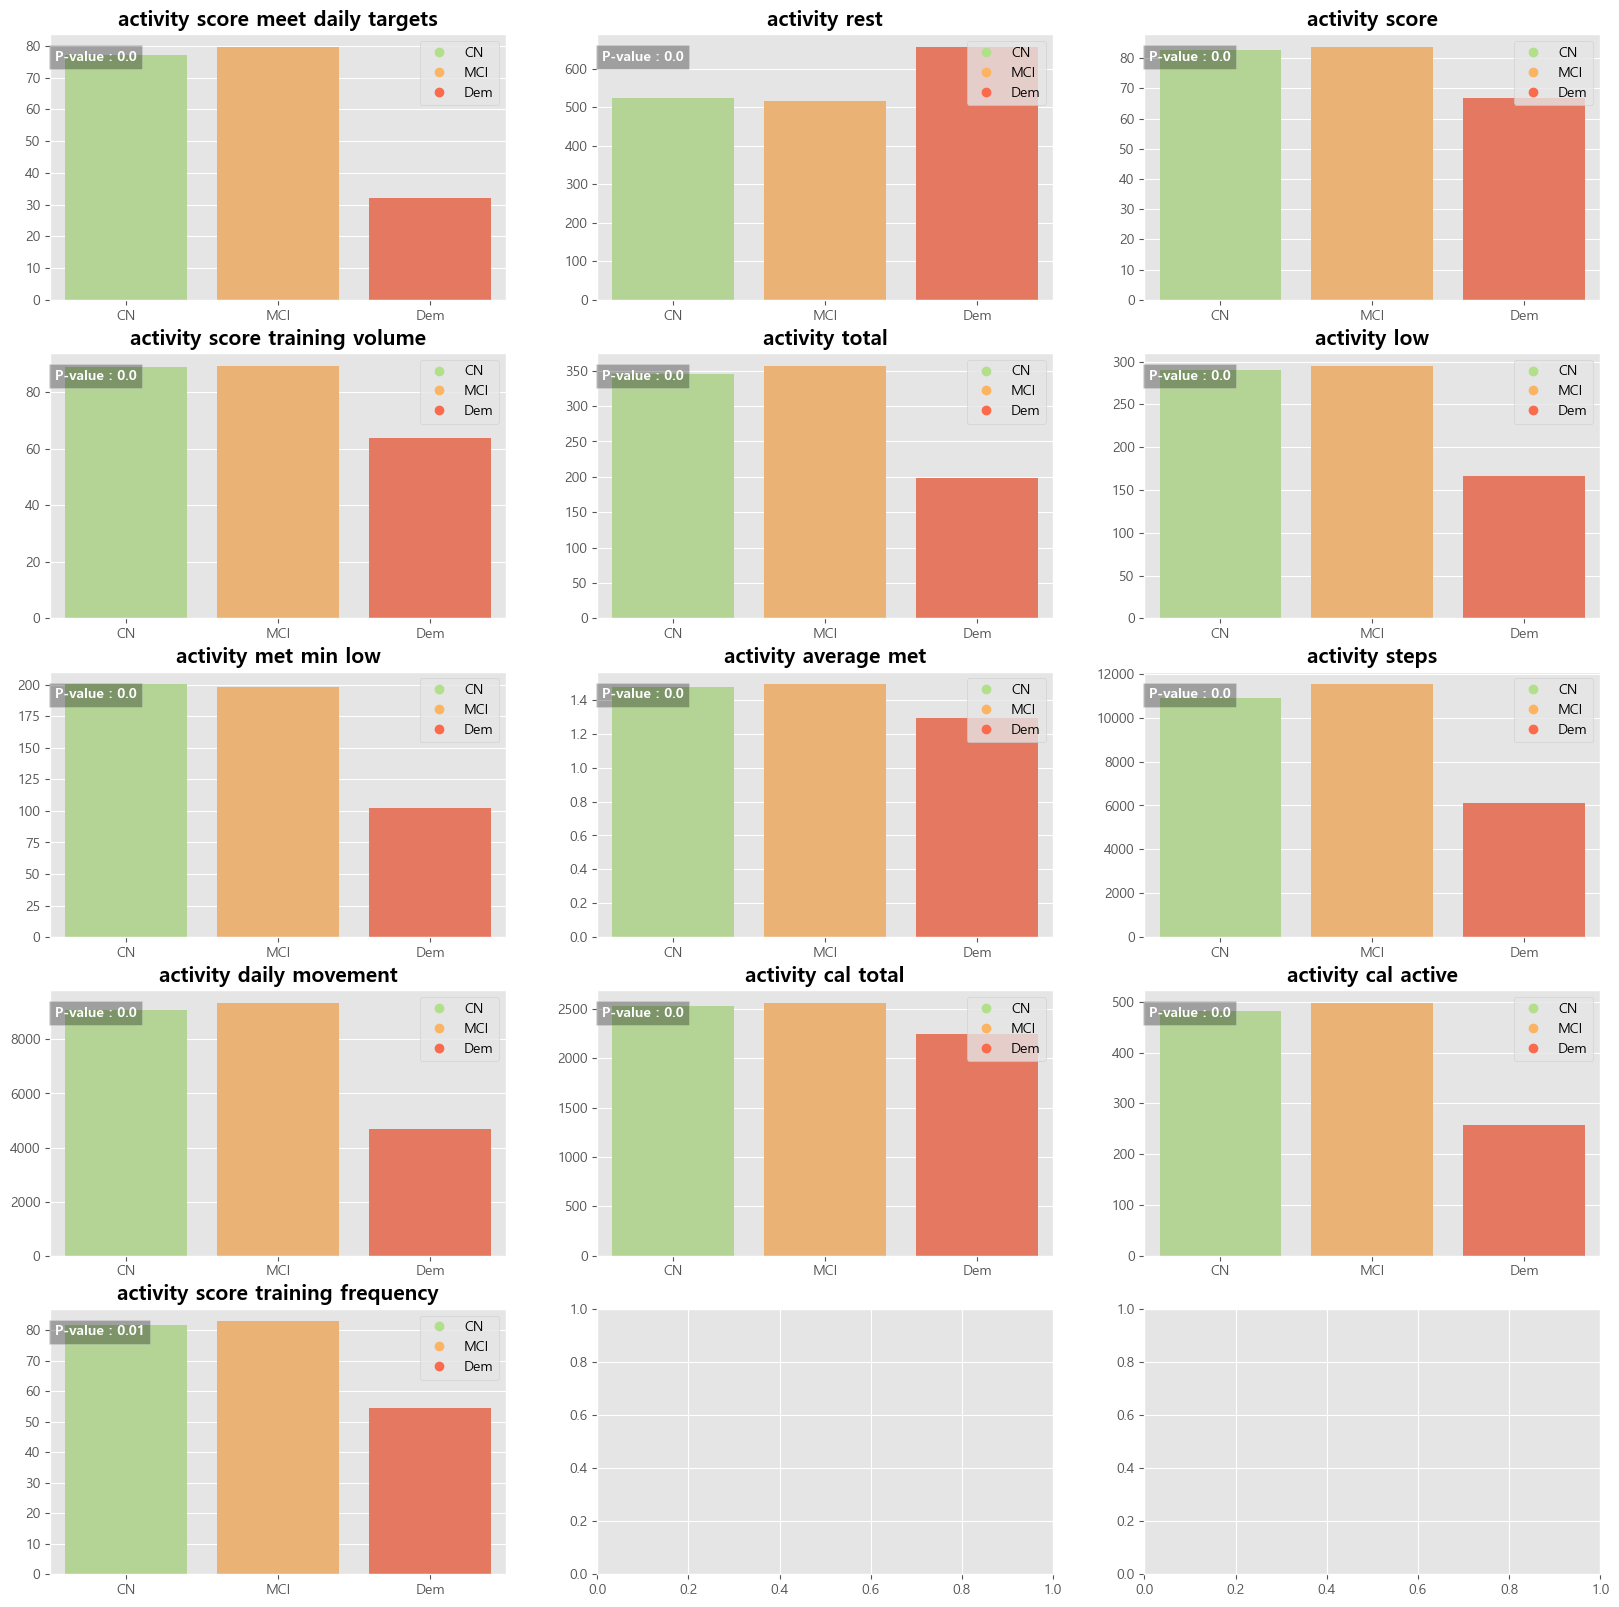

In [566]:
fig,ax = plt.subplots(ncols = 3,nrows = 5, figsize = (20,20))

target_colors = {'CN':'#b2df8a','MCI':'#fdb462','Dem':'#fb6a4a'}

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]

ax = ax.flatten()

colors = ['#b2df8a','#fdb462','#fb6a4a']

p_value = activity_pvalue['p-value'].values

for i,col in enumerate(activity_pvalue.index):
        
    p = round(p_value[i],2)
    
    sns.barplot(data = df,
                x = 'target',
                y = col,
                ax = ax[i],
                order = ['CN','MCI','Dem'],
                palette = ['#b2df8a','#fdb462','#fb6a4a'],
                ci = None)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col.replace('_',' '), fontsize = 15, weight = 'bold')
    ax[i].legend(handles = legend_elements,
                frameon = True,
                loc = 'upper right')
    ax[i].text(0.01, 0.9, f'P-value : {p}', transform=ax[i].transAxes, fontsize=10, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.3))

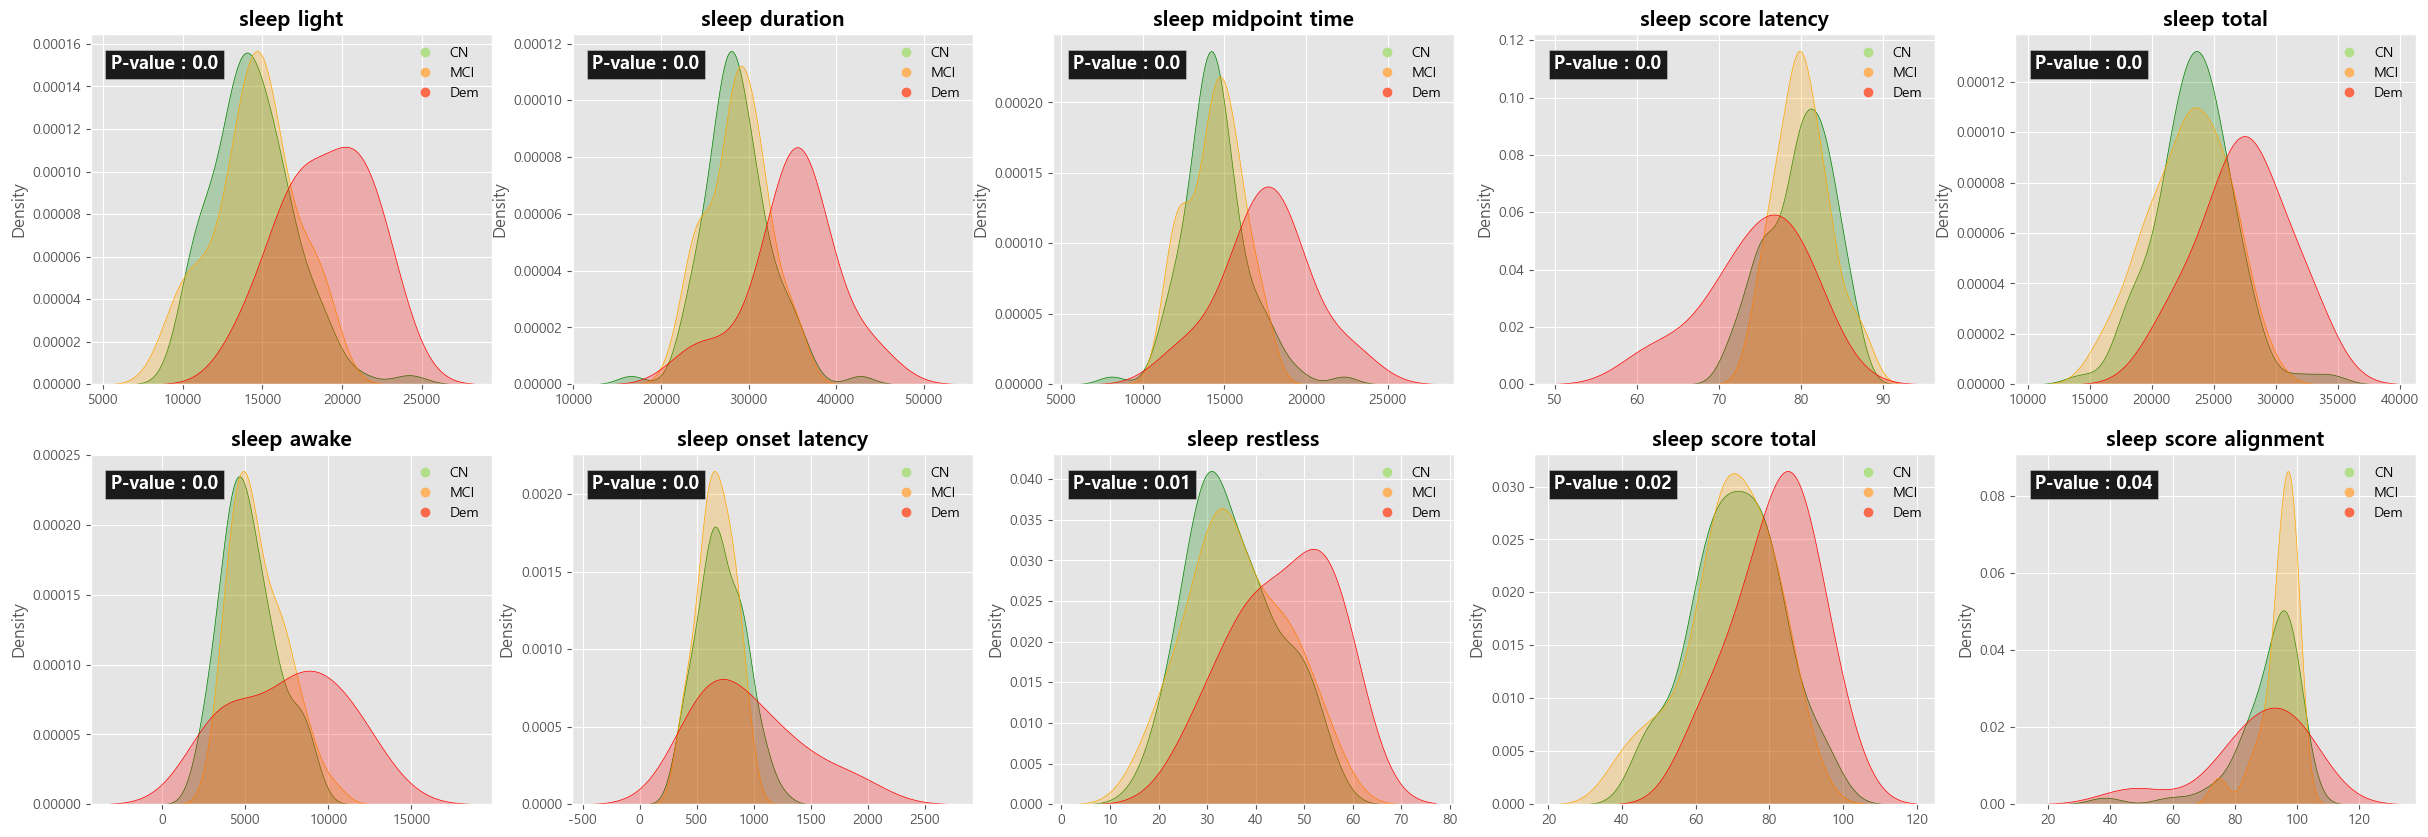

In [567]:
fig,ax = plt.subplots(ncols = 5,nrows = 2, figsize = (30,10))

target_colors = {'CN':'#b2df8a','MCI':'#fdb462','Dem':'#fb6a4a'}

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]

ax = ax.flatten()

colors = ['green','orange','red']


p_value = sleep_pvalue['p-value'].values

for i,col in enumerate(sleep_pvalue.index):
    for num,target in enumerate(['CN','MCI','Dem']):
        
        p = round(p_value[i],2)
        
        sns.kdeplot(data = df[df['target'] == target],
                    x = col,
                    ax = ax[i],
                    fill = True,
                    color = colors[num])
        ax[i].set_xlabel('')
        ax[i].set_title(col.replace('_',' '), fontsize = 15, weight = 'bold')
        ax[i].legend(handles = legend_elements,
                    frameon = False,
                    loc = 'upper right')
        # add text to ax
        ax[i].text(0.05, 0.9, f'P-value : {p}', transform=ax[i].transAxes, fontsize=13, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.5))

<aside>
💡 INSIGHT




**치매군 환자**가 **비 치매군**과 **경도 인지 장애군**에 비해 수면의 양과 관련된 요소들이 높았습니다. 

하지만 수면의 질과 연관된 변수들에 있어서는 (깊은 수면, 수면 점수 등) **비 치매군**에 비해 **치매군 환자**와 **경도 인지 장애군**이 ****낮은 양상을 보였습니다. 그 중 **치매군 환자**가 가장 낮았습니다.

</aside>

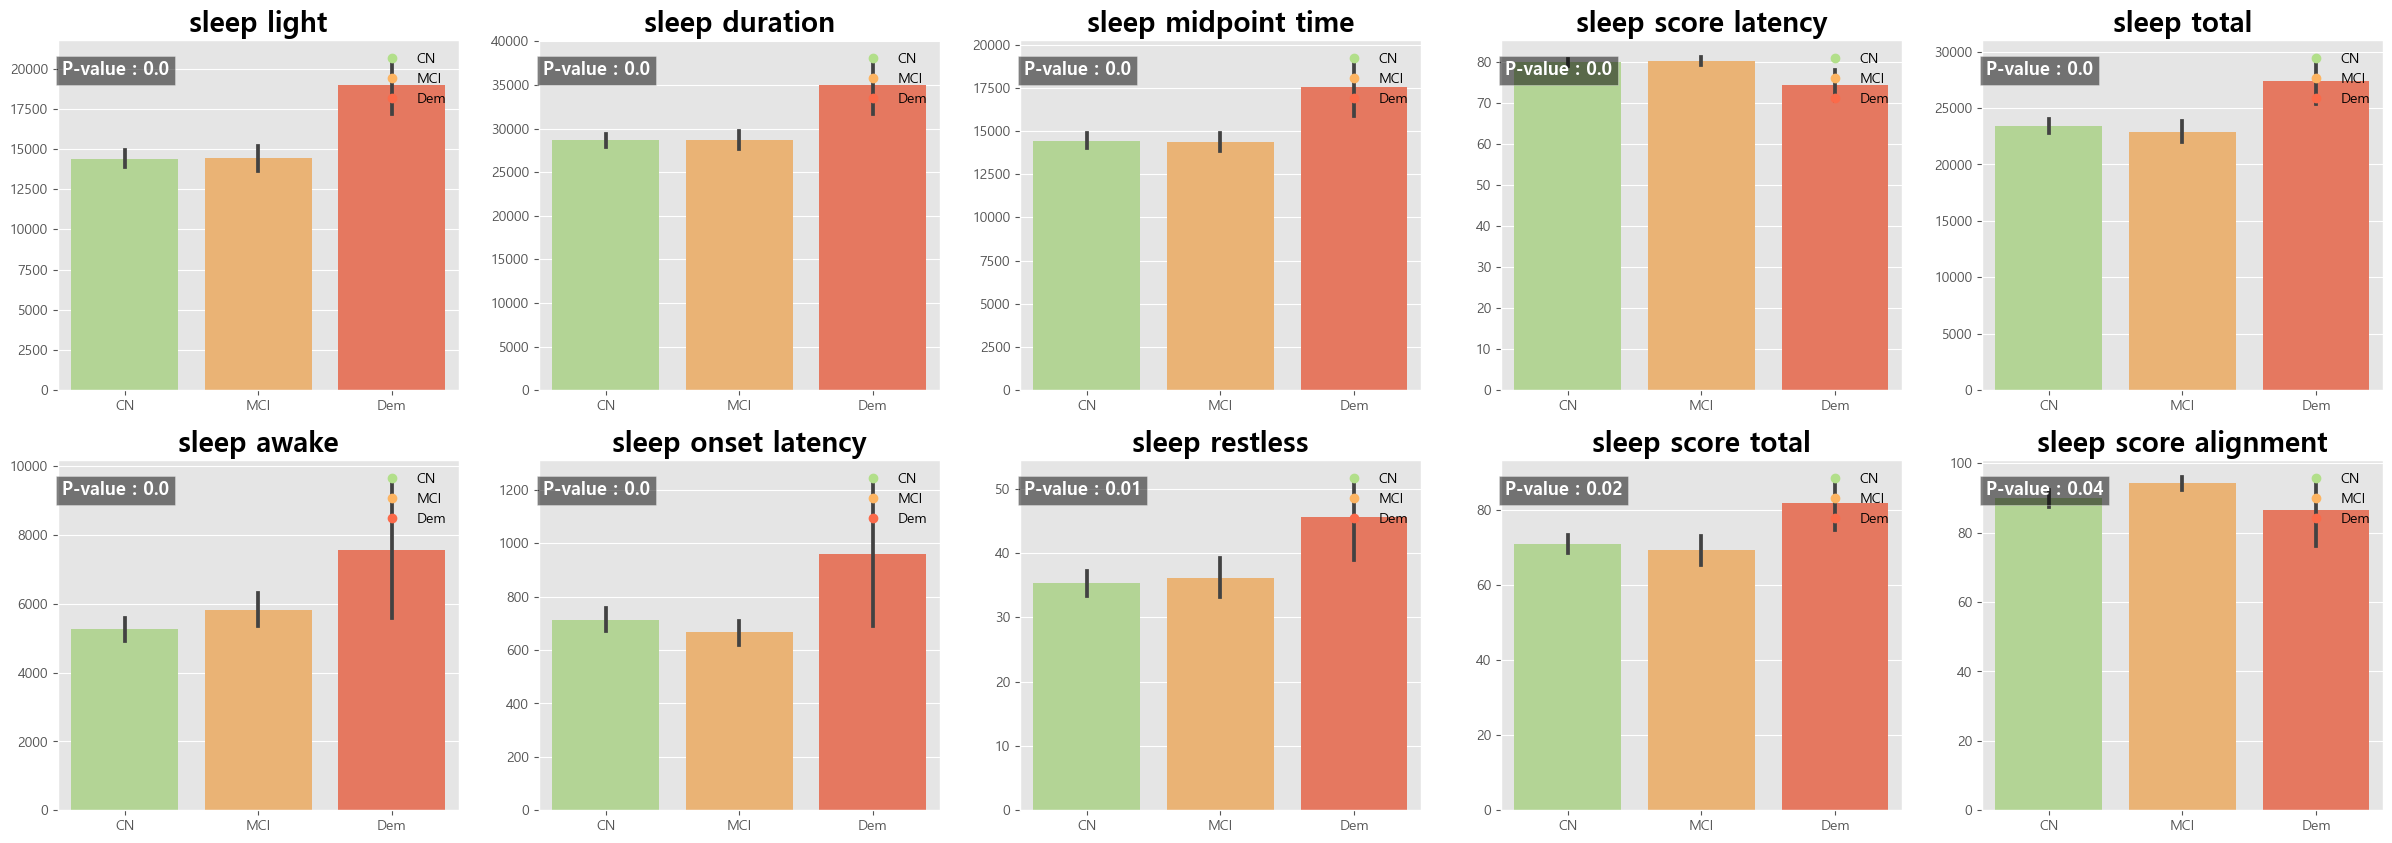

In [568]:
fig,ax = plt.subplots(ncols = 5,nrows = 2, figsize = (30,10))

target_colors = {'CN':'#b2df8a','MCI':'#fdb462','Dem':'#fb6a4a'}

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]

ax = ax.flatten()

colors = ['#b2df8a','#fdb462','#fb6a4a']

p_value = sleep_pvalue['p-value'].values

for i,col in enumerate(sleep_pvalue.index):
        
    p = round(p_value[i],2)
    
    sns.barplot(data = df,
                x = 'target',
                y = col,
                ax = ax[i],
                order = ['CN','MCI','Dem'],
                palette = ['#b2df8a','#fdb462','#fb6a4a'],
                ci = None)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_title(col.replace('_',' '), fontsize = 20, weight = 'bold')
    ax[i].legend(handles = legend_elements,
                frameon = False,
                loc = 'upper right')
    ax[i].text(0.01, 0.9, f'P-value : {p}', transform=ax[i].transAxes, fontsize=13, fontweight='bold', color='white', bbox=dict(facecolor='black', alpha=0.5))

# Correlationship

In [569]:
activity_corr = df[activity_cols].corr()

sleep_corr = df[sleep_cols].corr()

In [570]:
activity_mask = np.triu(np.ones_like(activity_corr))

sleep_mask = np.triu(np.ones_like(sleep_corr))

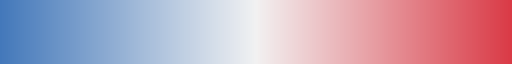

In [571]:
cmap = sns.diverging_palette(250,10, as_cmap = True) # 상관관계표에 사용할 cmap 객체 생성

cmap

In [572]:
bound = np.array(np.arange(-1,1,0.2))

norm = mpl.colors.BoundaryNorm(bound,ncolors = cmap.N) # cmap 의 경계 생성 

Text(0.5, 1.0, '활동내역 데이터 상관관계 히트맵')

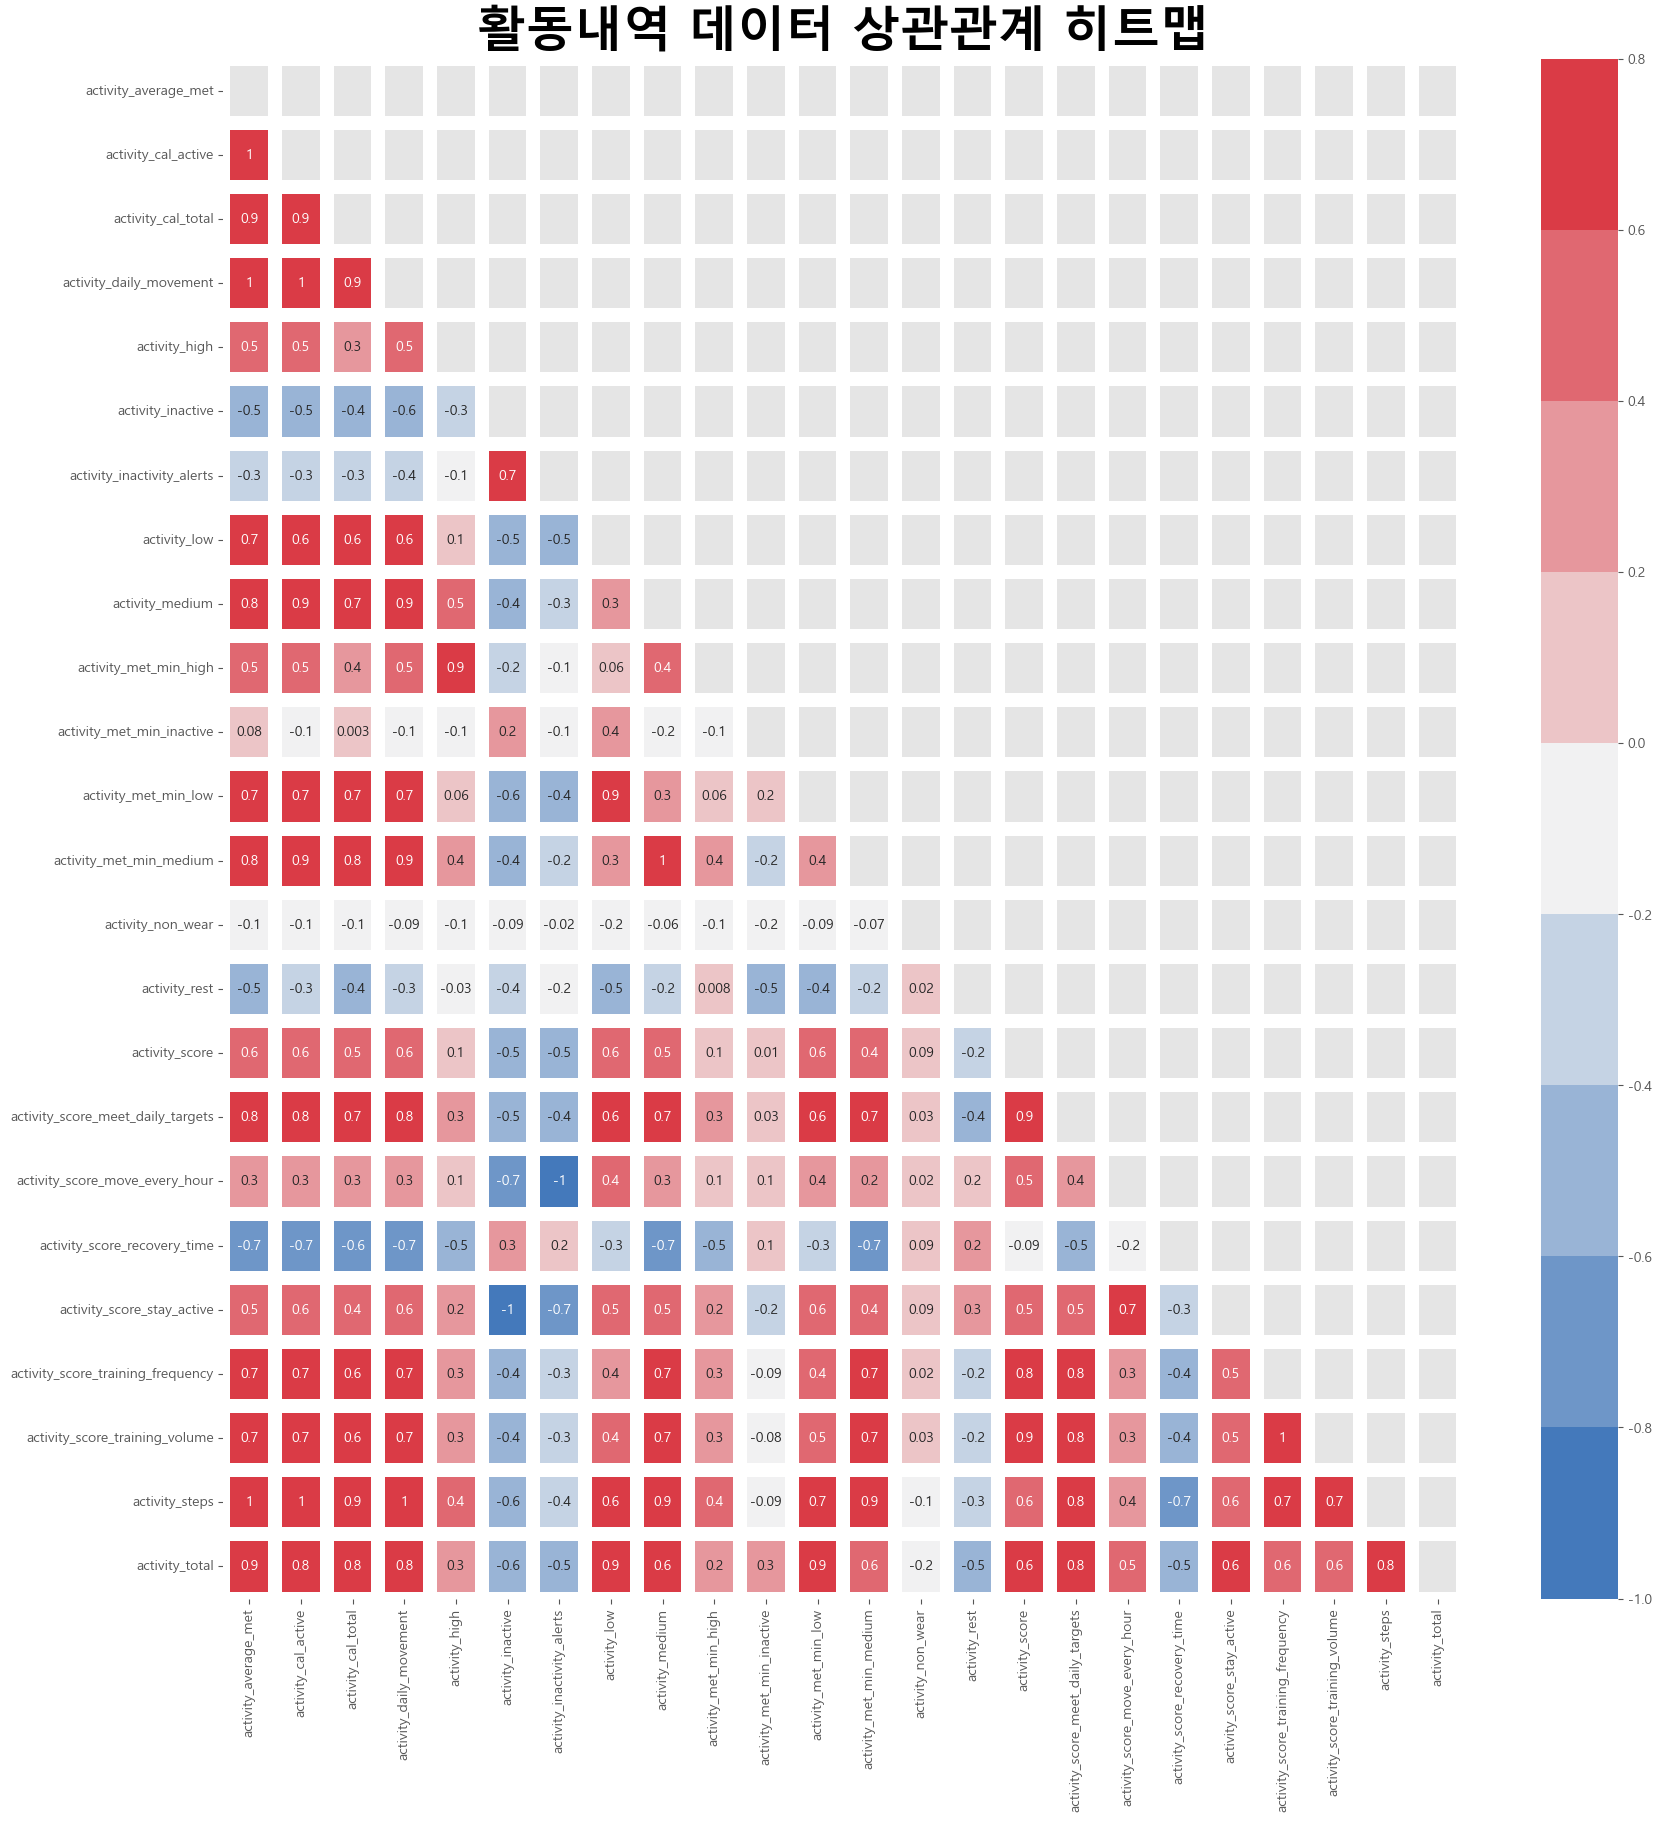

In [573]:
plt.figure(figsize = (20,20))
sns.heatmap(activity_corr,cmap = cmap, norm = norm, annot = True,mask = activity_mask,
            linewidths = 10, fmt = '.1g')
plt.title('활동내역 데이터 상관관계 히트맵',fontsize = 35, fontdict = {'fontstyle':'italic','weight':'bold'})

<aside>
💡 INSIGHT

대부분의 독립 변수간 상관관계를 보이고 있는 경우가 많습니다. (activity non waer 제외)

 이는 같은 내용을 표현하는 평가 지표들이 중복되어 나타남에 나타나는 현상 같습니다.
현재 데이터에서는 활동내역을 시간으로 평가하거나 , MET 로 평가하거나, score 로 평가 하고 있습니다. 

 또한 긍정과 부정을 모두 표현하는 변수들이 존재함에 따라 상관관계가 -0.9 이하로 나타나는 경우도 잦습니다. 예를 들어 하루 활동량과 하루 비활동량과 같은 변수를 뜻합니다.

 적절한 feature enginearing 이 필요해보입니다.

</aside>

Text(0.5, 1.0, '수면 내역 데이터 상관관계 히트맵')

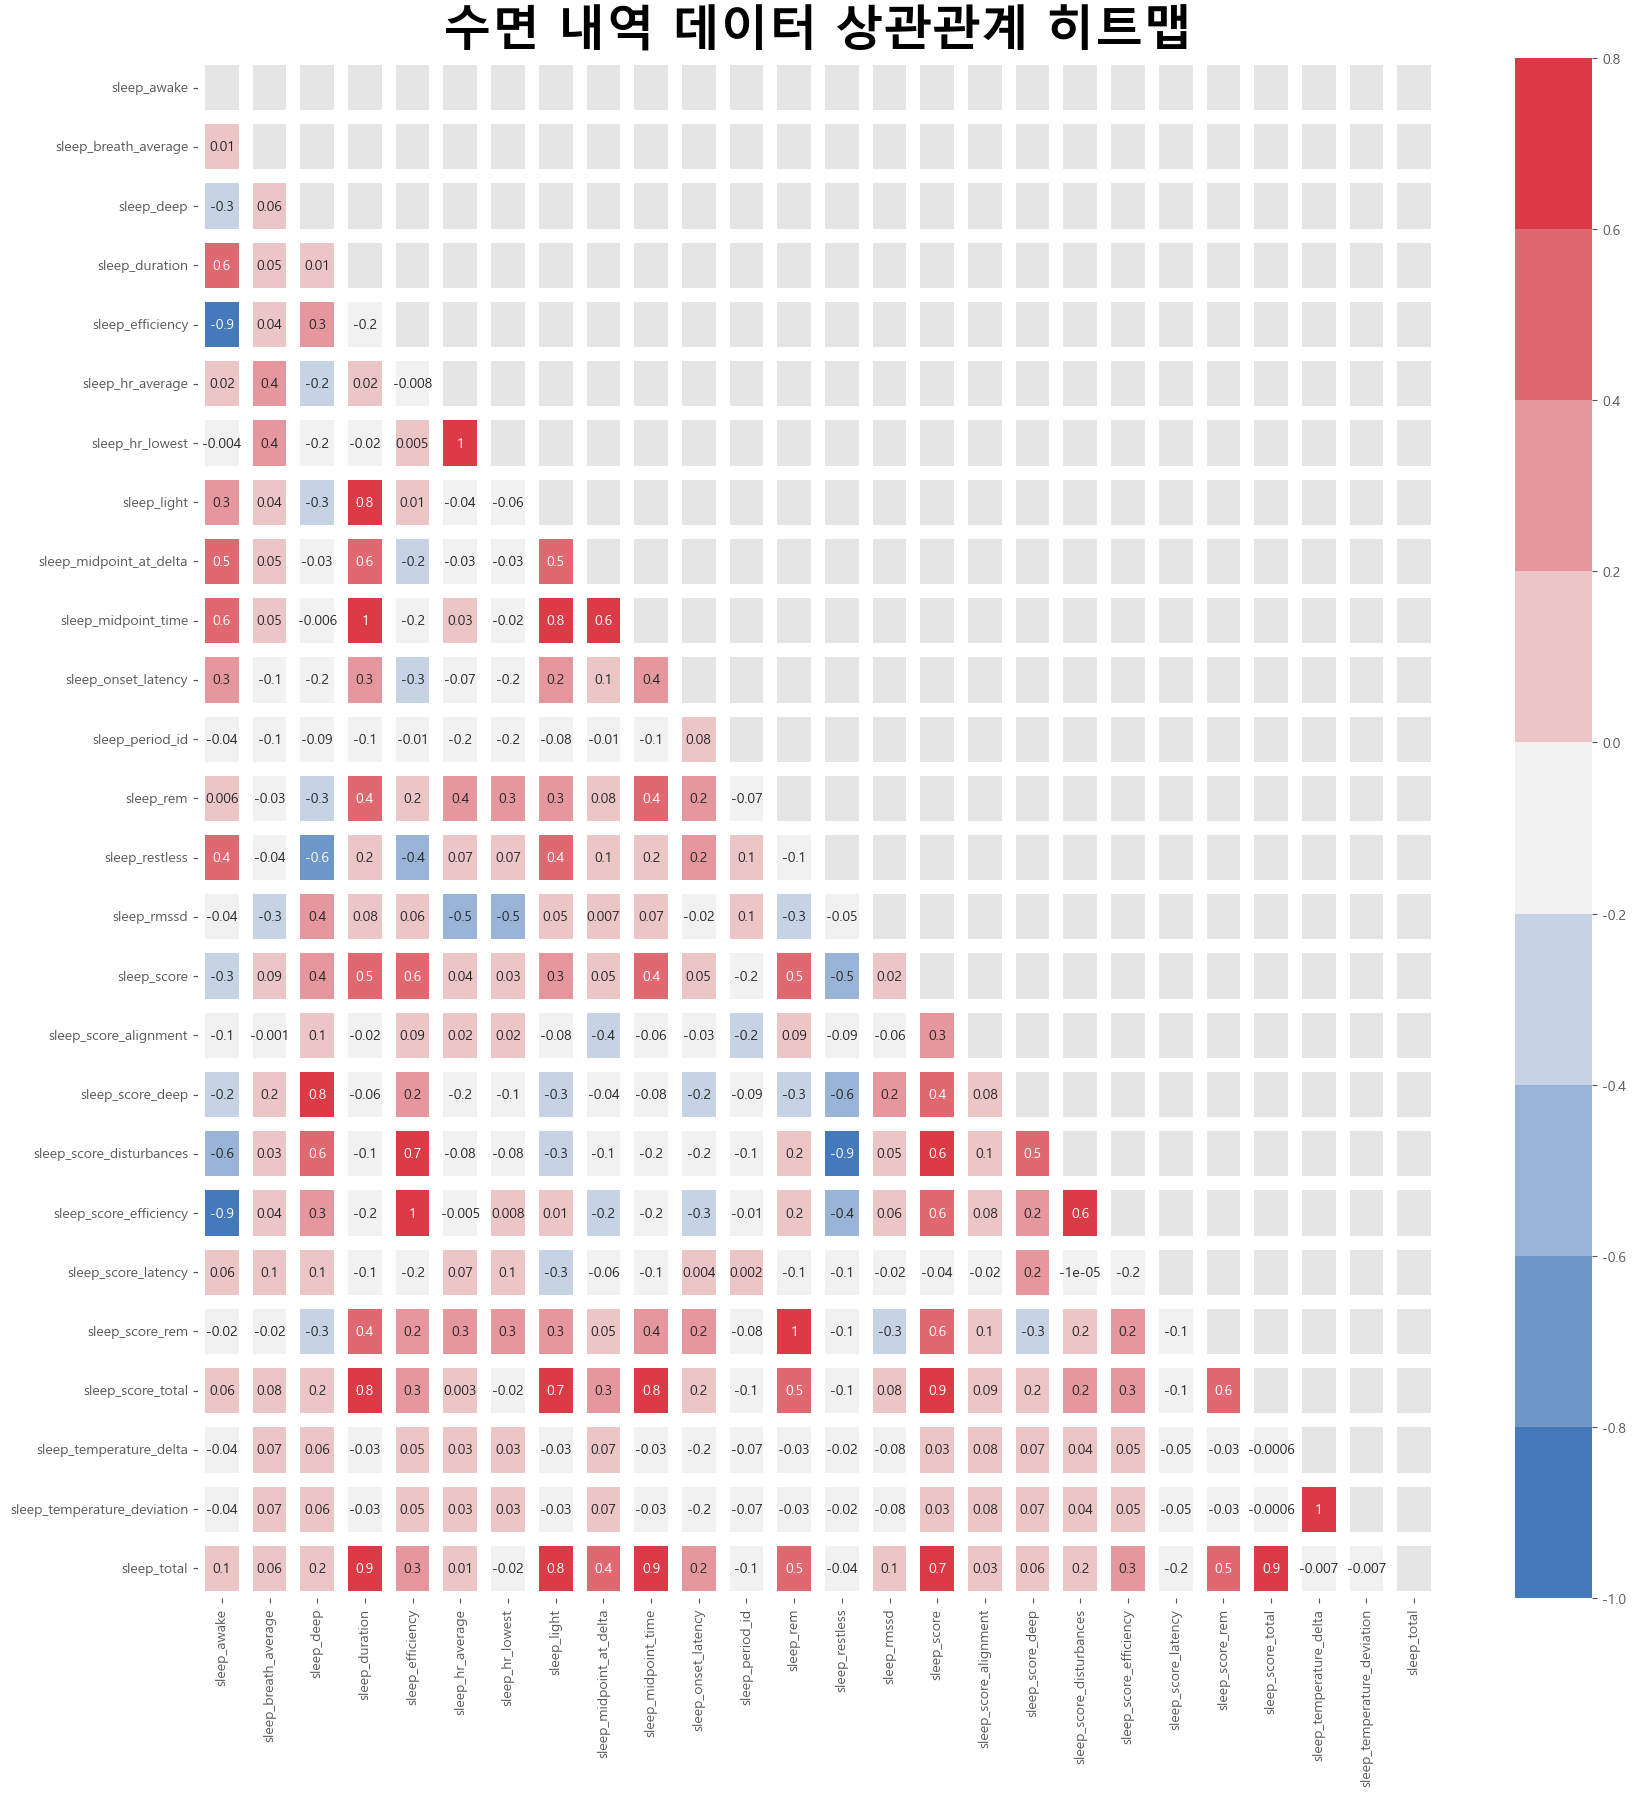

In [574]:
plt.figure(figsize = (20,20))
sns.heatmap(sleep_corr,cmap = cmap, norm = norm, annot = True,mask = sleep_mask,
            linewidths = 10, fmt = '.1g')
plt.title('수면 내역 데이터 상관관계 히트맵',fontsize = 35, fontdict = {'fontstyle':'italic','weight':'bold'})

<aside>
💡 INSIGHT

활동 내역 데이터와 다르게 상관관계가 강한 데이터들이 많지 않습니다.

0.8 이상의 매우 강한 상관 관계를 보이는 변수를 살펴보면 
1. 기상시간과 수면 효율성이 -0.9 로 매우 강한 음의 상관관계를 보입니다.
2. 수면 안정성과 수면 중 뒤척임 점수가 -0.9로 매우 강한 음의 상관 관계를 보입니다.
3. 수면 점수와 수면 중 뒤척임 정도가 -0.8로 매우 강한 음의 상관 관계를 보입니다.
4. 가벼운 수면 시간과 수면 중간점 시간이 0.8 로 매우 강한 양의 상관 관계를 보입니다.

수면과 관련된 독립 변수들간에서도 독립 변수의 조합으로 이뤄진 변수들이 많습니다.
이 또한 feature engiearing 의 필요성이 느껴집니다.

</aside>

# PCA

In [575]:
def do_pca(df, components, make_plot = True):
    
    pca = PCA(n_components = components) 
    
    X = df.drop('target',axis = 1)
    Y = df['target']
    
    pca_df = pd.DataFrame(pca.fit_transform(X))
    
    pca_df['target'] = Y
    
    
    if make_plot == True:
    
        target_colors = {'CN':'green', 'MCI':'orange','Dem':'red'}
        
        cmap = Y.map(target_colors)
        
        legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                        for label, color in target_colors.items()]
        
        if components == 2:
            
            fig, ax = plt.subplots()
            
            ax.scatter(pca_df[0],pca_df[1], color = cmap)
            ax.set_xticks([])
            ax.set_yticks([])
            
            
            ax.legend(handles = legend_elements,
                    frameon = True,
                    facecolor = 'white',
                    loc = 'upper right'
                    )
            
            fig.set_facecolor('black')
            
            
        if components == 3:
            
            fig,ax = plt.subplots(ncols = 3,
                                    figsize = (20,5),
                                    subplot_kw = {'projection':'3d'})
            
            view = [10,45,75]
            
            for i in range(3):
                
                ax[i].scatter(pca_df[0],pca_df[1],pca_df[2],color = cmap)
                ax[i].set_xticks([])
                ax[i].set_yticks([])
                ax[i].set_zticks([])
                ax[i].view_init(10,view[i])
                
                ax[i].set_facecolor('black')
                
            fig.set_facecolor('black')
            
            fig.legend(handles = legend_elements,
                    frameon = True,
                    facecolor = 'white',
                    bbox_to_anchor = (1,1),
                    )
            

    return pca_df
    

### 모든 변수를 고려한 차원 축소 결과

Text(0.5, 1.0, '차원 축소 후 살펴보는 데이터 패턴')

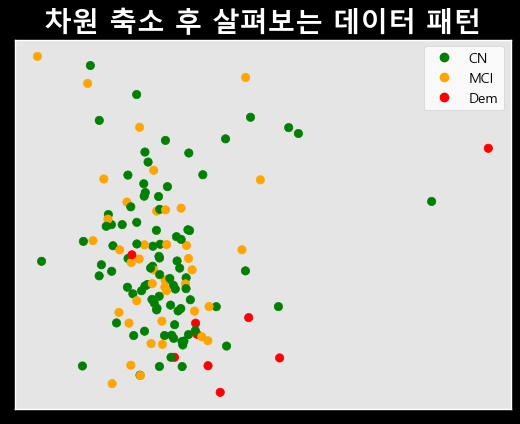

In [576]:
do_pca(df,2)
plt.title('차원 축소 후 살펴보는 데이터 패턴', color = 'white', fontsize = 20,weight = 'bold')

Text(0.5, 0.98, '모든 변수를 고려하여 차원 축소 후 살펴보는 데이터 패턴')

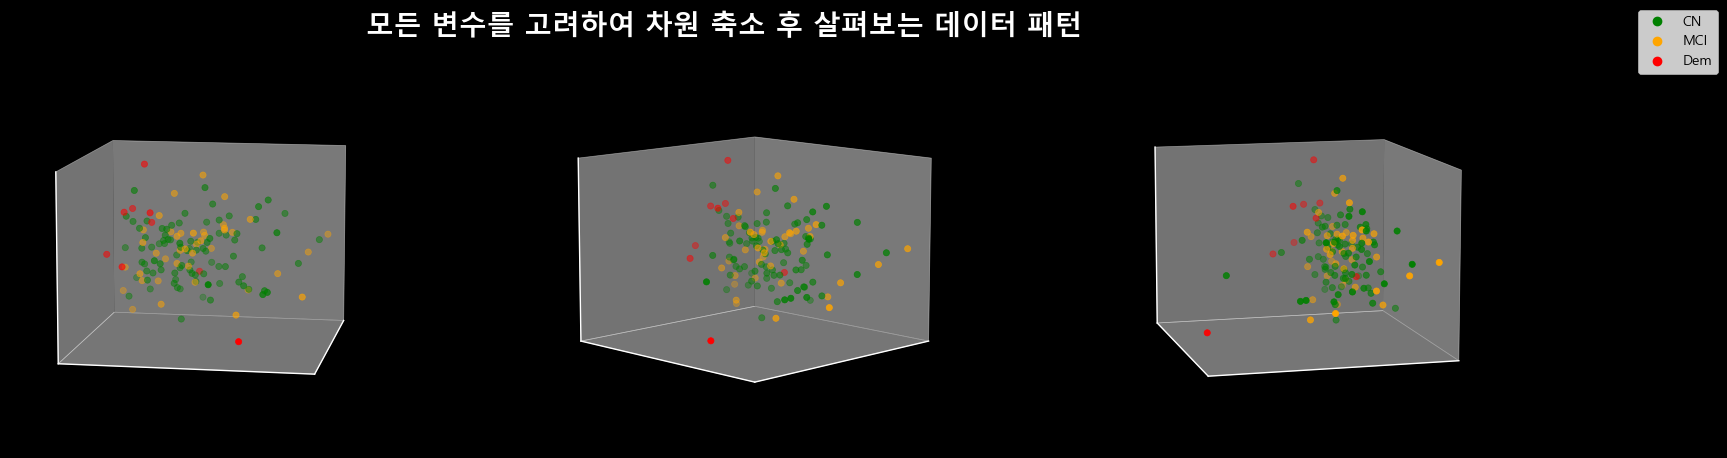

In [577]:
do_pca(df,3)
plt.suptitle('모든 변수를 고려하여 차원 축소 후 살펴보는 데이터 패턴', color = 'white', fontsize = 20,weight = 'bold')

<aside>
💡 INSIGHT

1. **비 치매군**과 **경도 인지 장애** 간 데이터가 패턴이 유사하게 보이는 것만 같습니다.가끔 두 클래스끼리 밀집된 지역이 있기도 하지만 대부분의 영역을 살펴 보았을 때 각 클래스 간 밀집되어 있는 모습을 볼 수 있습니다.
2. **치매군**은 이상치처럼 멀리 나와있는 경우가 많습니다. 중앙에 분포 된 두 개의 치매 군을 제외하고 말입니다.

</aside>

In [578]:
activity_anova_cols = activity_anova[activity_anova['p-value'] < 0.05].index.tolist()
sleep_anova_cols = sleep_anova[sleep_anova['p-value'] < 0.05].index.tolist()

full_anova = activity_anova_cols + sleep_anova_cols + ['target']

print(full_anova)

['activity_score_meet_daily_targets', 'activity_rest', 'activity_score', 'activity_score_training_volume', 'activity_total', 'activity_low', 'activity_met_min_low', 'activity_average_met', 'activity_steps', 'activity_daily_movement', 'activity_cal_total', 'activity_cal_active', 'activity_score_training_frequency', 'sleep_light', 'sleep_duration', 'sleep_midpoint_time', 'sleep_score_latency', 'sleep_total', 'sleep_awake', 'sleep_onset_latency', 'sleep_restless', 'sleep_score_total', 'sleep_score_alignment', 'target']


Text(0.5, 1.0, '차원 축소 후 살펴보는 데이터 패턴')

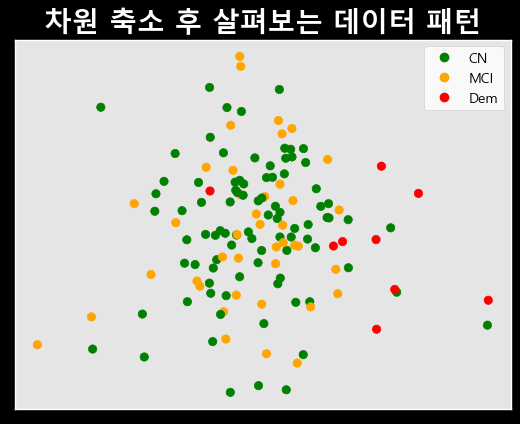

In [579]:
do_pca(df[full_anova],2)
plt.title('차원 축소 후 살펴보는 데이터 패턴', color = 'white', fontsize = 20,weight = 'bold')

Text(0.5, 0.98, '변수 선택 후 차원 축소 후 살펴보는 데이터 패턴')

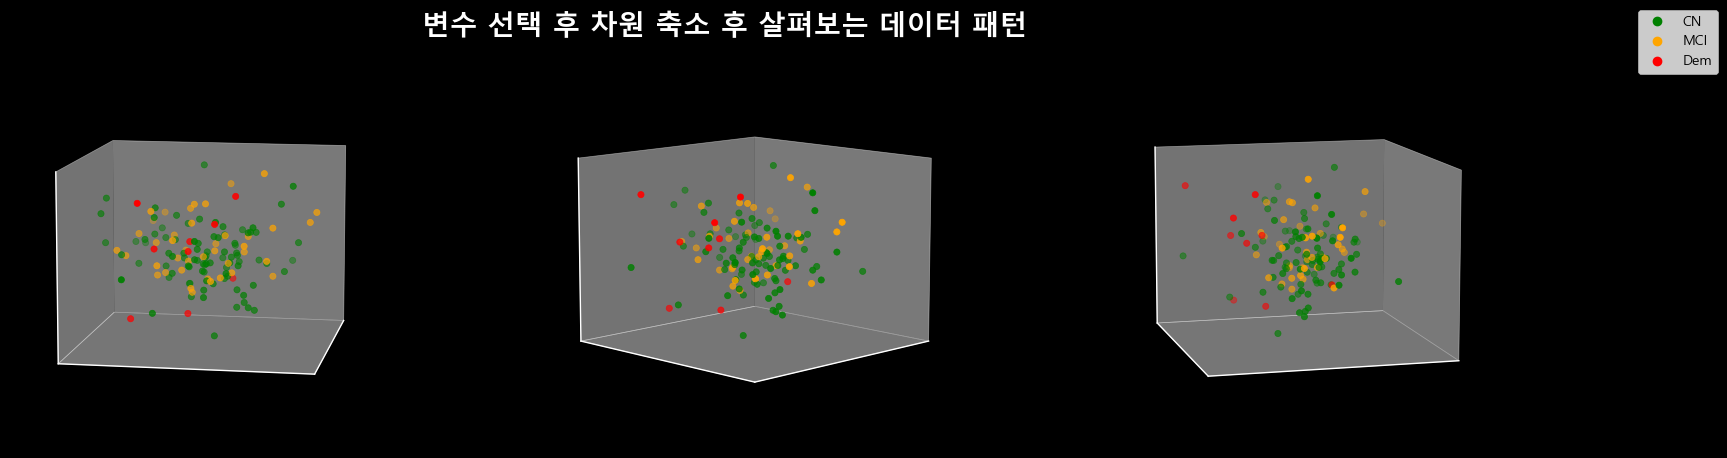

In [580]:
do_pca(df[full_anova],3)
plt.suptitle('변수 선택 후 차원 축소 후 살펴보는 데이터 패턴', color = 'white', fontsize = 20,weight = 'bold')

<aside>
💡 INSIGHT

1. **비 치매군**과 **경도 인지 장애** 간의 데이터 패턴의 차이가 조금 더 명확하게 드러나는 것 같습니다. 이 전 PCA 결과와 비교해보았을 때에 비해 **비 치매군**과 **경도 인지 장애군**의 거리가 조금 더 멀어졌습니다.
2. **치매군**은 변수 선택 전에 비해 더욱 눈에 띄게 이상치처럼 나와 있는 모습을 볼 수 있습니다.

</aside>

### 차원 축소 데이터 GIF 로 저장하기 

In [581]:
full_pca = do_pca(df,3,make_plot = False)
anova_pca = do_pca(df[full_anova],3,make_plot = False)

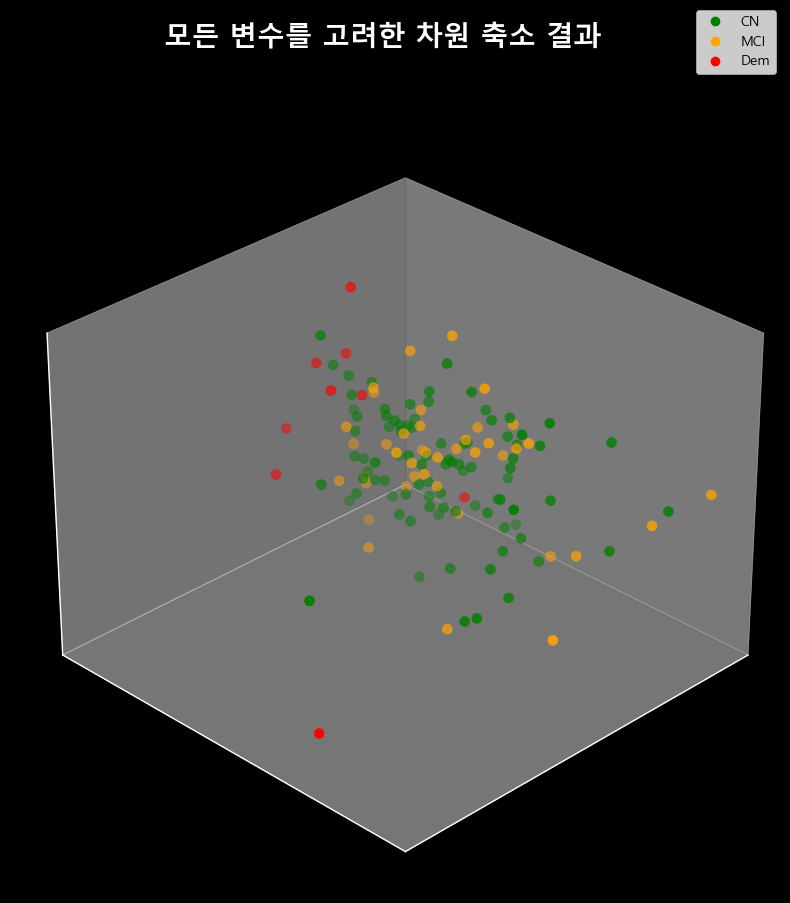

In [582]:
target_colors = {'CN':'green', 'MCI':'orange','Dem':'red'}

cmap = full_pca['target'].map(target_colors)

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                for label, color in target_colors.items()]


fullfig,ax = plt.subplots(subplot_kw = {'projection':'3d'},
                    figsize= (10,10))
fullfig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
fullfig.suptitle('모든 변수를 고려한 차원 축소 결과', fontsize = 20, color = 'white',weight = 'bold')

fullfig.legend(handles = legend_elements,
        frameon = True,
        facecolor = 'white',
        bbox_to_anchor = (0.9,1),
        )

ax.view_init(30,45)
ax.scatter(full_pca[0],full_pca[1],full_pca[2], color = cmap, s = 50)


def full_update(i):

    cmap = full_pca['target'].map({'CN':'green','MCI':'orange','Dem':'red'})
        
    ax.view_init(30, i)
    scatter = ax.scatter(full_pca[0], full_pca[1], full_pca[2], s=30, color=cmap, alpha=0.5)
    return scatter,

In [583]:
ani = mpl.animation.FuncAnimation(fullfig, full_update, frames=range(0, 360, 10), repeat=True)
writer = PillowWriter(fps=5)
ani.save("full_pca.gif", writer=writer)

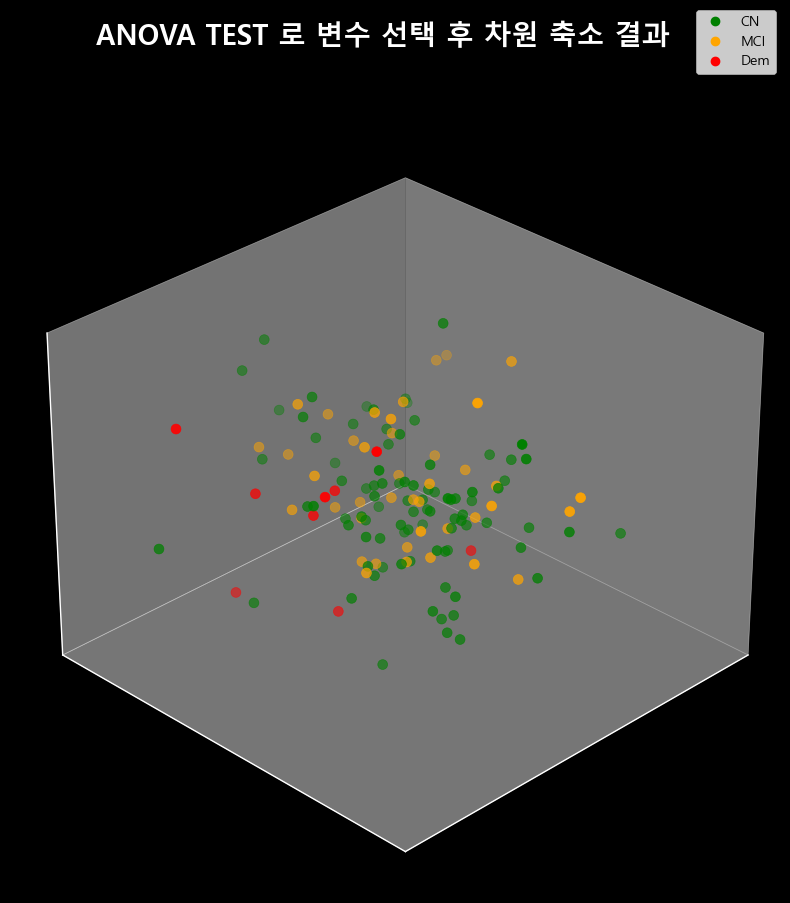

In [584]:
target_colors = {'CN':'green', 'MCI':'orange','Dem':'red'}

cmap = anova_pca['target'].map(target_colors)

legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle = ' ') 
                for label, color in target_colors.items()]


anova_fig,ax = plt.subplots(subplot_kw = {'projection':'3d'},
                        figsize= (10,10))
anova_fig.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
anova_fig.suptitle('ANOVA TEST 로 변수 선택 후 차원 축소 결과', fontsize = 20, color = 'white',weight = 'bold')

anova_fig.legend(handles = legend_elements,
        frameon = True,
        facecolor = 'white',
        bbox_to_anchor = (0.9,1),
        )

ax.view_init(30,45)
ax.scatter(anova_pca[0],anova_pca[1],anova_pca[2], color = cmap, s = 50)


def anova_update(i):
                
        cmap = anova_pca['target'].map({'CN':'green','MCI':'orange','Dem':'red'})
                
        ax.view_init(30, i)
        scatter = ax.scatter(anova_pca[0], anova_pca[1], anova_pca[2], s=30, color=cmap, alpha=0.5)
        return scatter,

In [585]:
ani = mpl.animation.FuncAnimation(anova_fig, anova_update, frames=range(0, 360, 10), repeat=True)
writer = PillowWriter(fps=5)
ani.save("anova_pca.gif", writer=writer)

# 최종 변수 선택 

* 그룹간의 차이가 유의미한 변수들을 가지고 변수를 선택하도록 하자 

In [593]:
print('사용 할 변수명은')
print(full_anova)

사용 할 변수명은
['activity_score_meet_daily_targets', 'activity_rest', 'activity_score', 'activity_score_training_volume', 'activity_total', 'activity_low', 'activity_met_min_low', 'activity_average_met', 'activity_steps', 'activity_daily_movement', 'activity_cal_total', 'activity_cal_active', 'activity_score_training_frequency', 'sleep_light', 'sleep_duration', 'sleep_midpoint_time', 'sleep_score_latency', 'sleep_total', 'sleep_awake', 'sleep_onset_latency', 'sleep_restless', 'sleep_score_total', 'sleep_score_alignment', 'target']


In [587]:
df = df[full_anova]

df.head()

,activity_score_meet_daily_targets,activity_rest,activity_score,activity_score_training_volume,activity_total,activity_low,activity_met_min_low,activity_average_met,activity_steps,activity_daily_movement,...,sleep_duration,sleep_midpoint_time,sleep_score_latency,sleep_total,sleep_awake,sleep_onset_latency,sleep_restless,sleep_score_total,sleep_score_alignment,target
0,98.691489,698.500000,83.829787,99.521277,262.319149,191.234043,131.351064,1.416556,11501.936170,9319.223404,...,34593.829787,17310.638298,81.595745,26132.872340,8460.957447,957.446809,28.819149,76.946809,88.936170,CN
1,94.072464,564.449275,96.072464,98.492754,389.666667,310.898551,240.086957,1.544384,14450.695652,11927.536232,...,32773.913043,16302.173913,79.869565,26380.434783,6393.478261,726.956522,32.246377,81.884058,98.173913,CN
2,82.452055,517.780822,87.054795,94.232877,350.191781,292.534247,190.671233,1.505993,11622.027397,9587.383562,...,29812.602740,14591.095890,77.397260,22469.589041,7343.013699,847.808219,48.876712,66.095890,95.452055,CN
3,99.583333,631.733333,87.950000,100.000000,379.850000,284.166667,236.633333,1.560417,16226.683333,13412.883333,...,35677.000000,18214.000000,82.233333,27394.000000,8283.000000,846.500000,49.650000,79.150000,89.483333,CN
4,54.494624,416.043011,72.419355,72.086022,321.096774,293.892473,180.677419,1.452957,8017.204301,5915.397849,...,24140.000000,11944.838710,75.129032,20440.967742,3699.032258,373.225806,24.225806,57.860215,94.354839,MCI


* 선택한 변수끼리의 상관 관계

In [588]:
cmap = sns.diverging_palette(250,10, as_cmap = True)

boundary = np.array(np.arange(-1,1,0.2))

norm = mpl.colors.BoundaryNorm(boundary, cmap.N)

<AxesSubplot:>

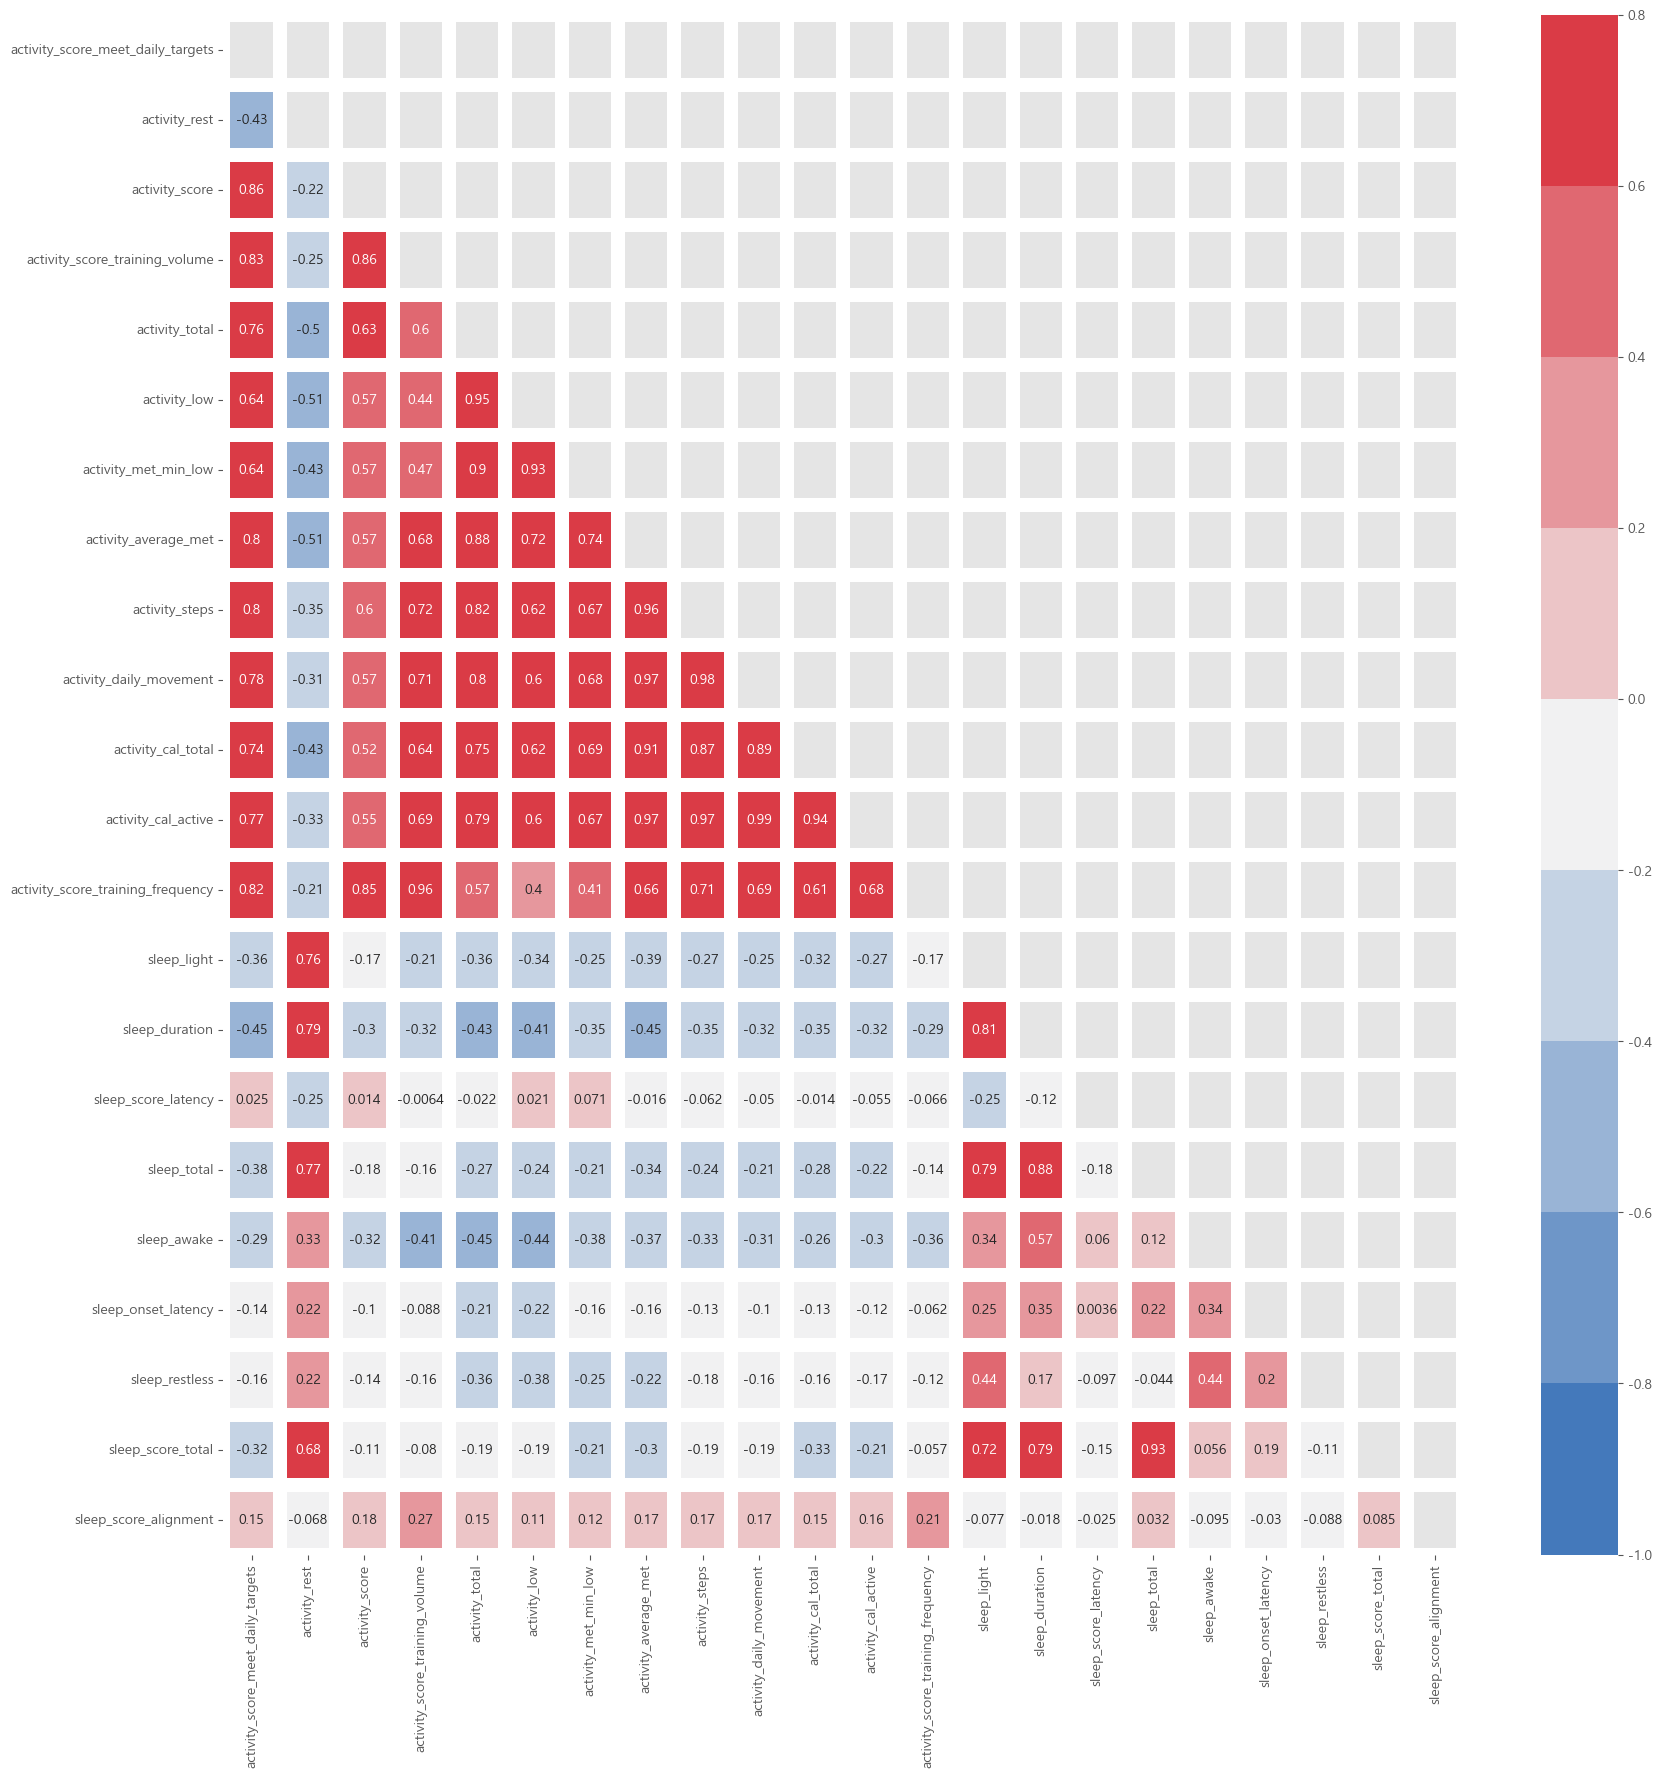

In [596]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize = (20,20))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2g', 
                cmap = cmap , norm = norm, linewidths = 10)

<aside>
💡 INSIGHT

1. **비 활동성 시간** (acitivity rest)이 많을 수록 **수면 시간** (sleep total) 이 높았습니다. (상관 관계 0.8)
대상자들의 주 비활동성 시간은 수면 시간인 것으로 보입니다.

2. **수면 시간**(sleep duration) 과 **수면 중간점 시간** (sleep_midpoint_time)은 매우 유사한 변수로 보입니다. 두 변수 간의 상관관계는 약 1이며, 타 독립 변수들간의 상관관계도 유사합니다.
두 변수 모두 anova test 시 p-value 가 0.00 이하임으로 해석하기 어려운 **수면 중간점 시간**은 제외하고 모델링 해야겠습니다.

</aside>

In [590]:
df = df.drop('sleep_midpoint_time',axis = 1)

### 상관관계 높은 변수들끼리 회귀 플롯

* 보류하자. 너무 갯수도 많다.

In [591]:
# corr = df.corr()
# m = len(corr)

# cols = []
# indexes = []

# for i in range(1,m):
#     for j in range(i):
        
#         if np.abs(corr.iloc[i,j]) > 0.7:
#             cols.append(corr.columns[j])
#             indexes.append(corr.index[i]) # 상관관계가 -0.7 이하, 0.7 이상인 경우의 인덱스과 컬럼을 리스트 형태로 저장 

IndexError: index 8 is out of bounds for axis 0 with size 8

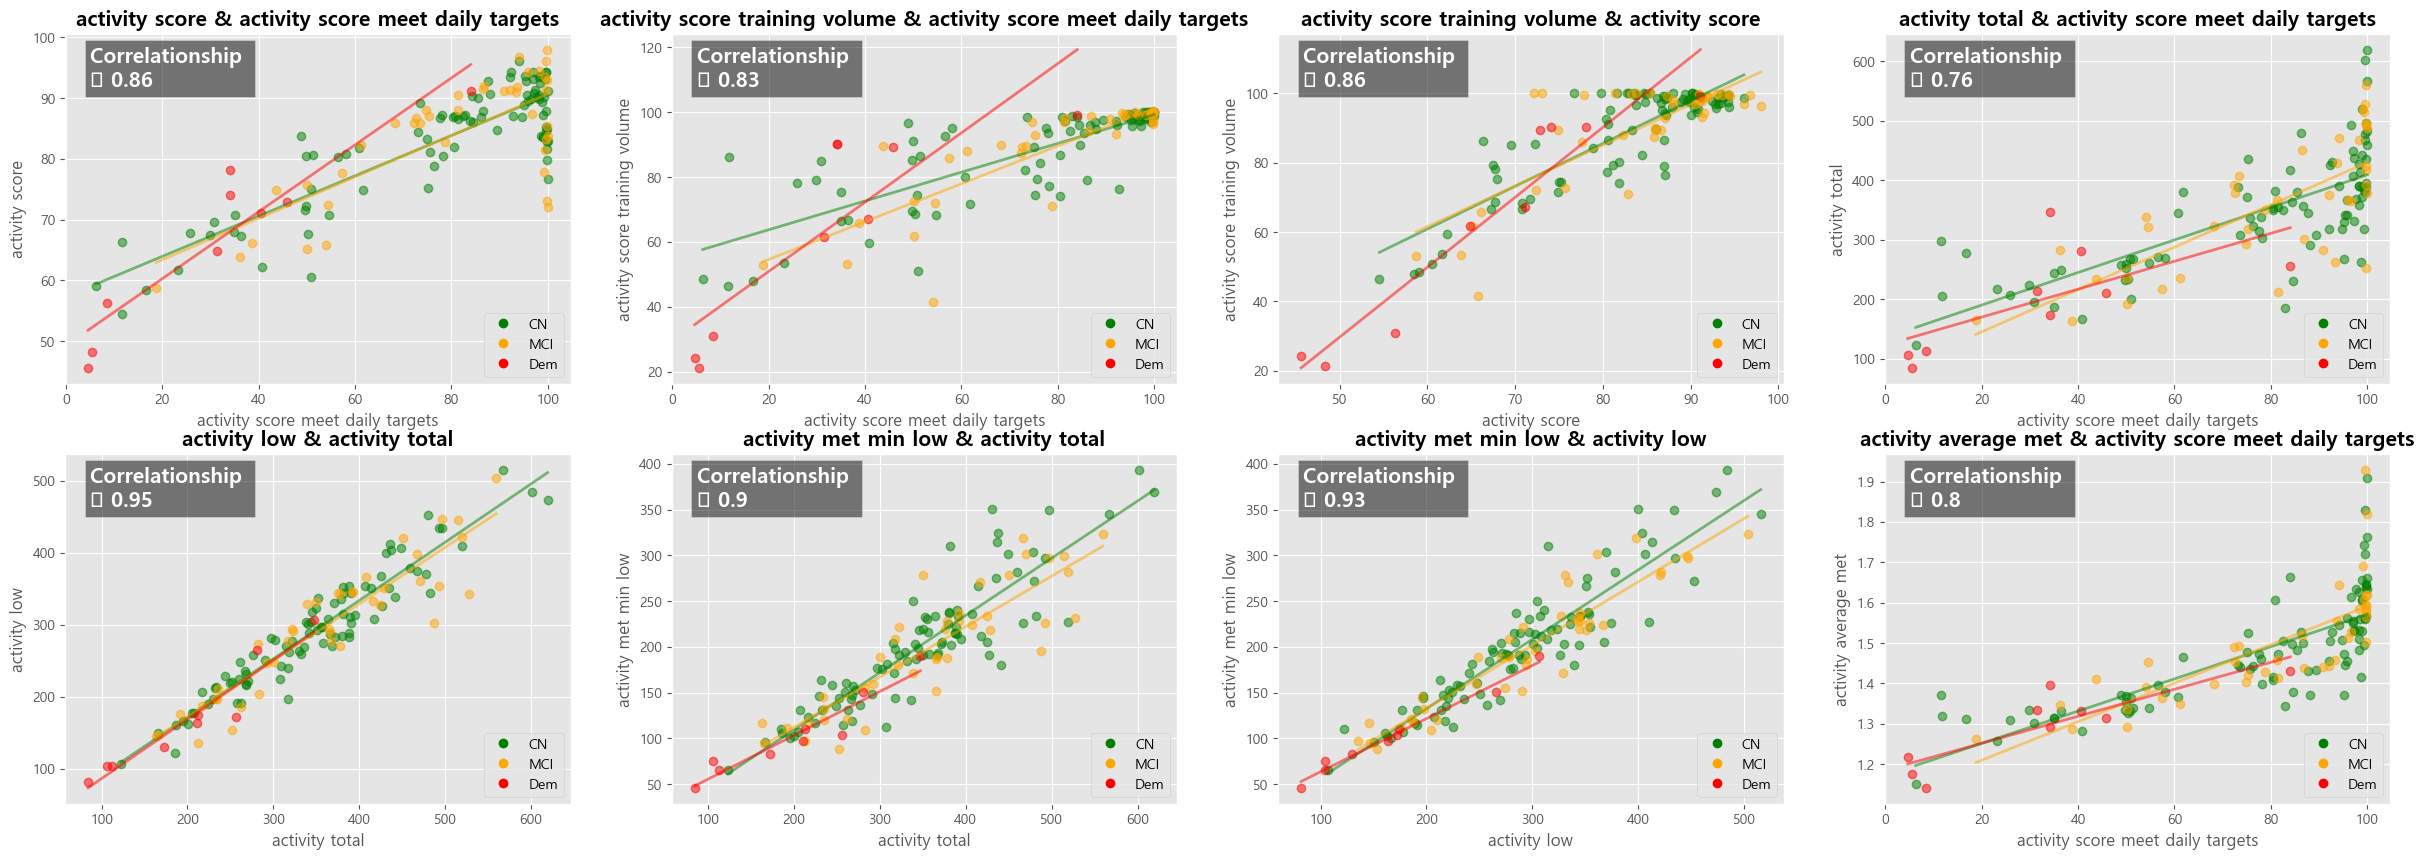

In [592]:
# target_colors = {'CN':'green','MCI':'orange','Dem':'red'}

# fig,ax = plt.subplots(ncols = 4, nrows = 2, figsize = (30,10))

# ax = ax.flatten()

# for i,(idx,col) in enumerate(zip(cols,indexes)):
    
#     cor = round(df[[idx,col]].corr().iloc[0,1],2)
    
#     for hue,color in target_colors.items():
        
#         sns.regplot(data = df[df['target'] == hue],
#                     x = idx,
#                     y = col,
#                     color = color,
#                     scatter_kws = {'alpha':0.5},
#                     line_kws = {'alpha':0.5, 'linewidth':2},
#                     ax = ax[i],
#                     ci = None)
        
#     idx = idx.replace('_',' ')
#     col = col.replace('_',' ')
#     ax[i].text(0.05,0.85,f'Correlationship \n\t {cor}',transform = ax[i].transAxes, size = 15,
#                 color = 'white',fontweight = 'bold',bbox=dict(facecolor='black', alpha=0.5))
#     ax[i].set_title(f'{col} & {idx}', size = 15, weight = 'bold')
#     ax[i].set_ylabel(col)
#     ax[i].set_xlabel(idx)
#     handles = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='') 
#             for label, color in target_colors.items()]
#     ax[i].legend(handles=handles, loc='lower right')

<aside>
💡 INSIGHT

이전 상관관계표에서 봤던 독립 변수들은 비치매군, 경도인지장애군, 치매군 모두 상관관계가 동일하게 높은 모습을 볼 수 있습니다.

</aside>

# 모델링

### 평가 지표 설정 

- F1 micro는 모든 클래스를 하나의 큰 클래스로 보고 계산하는 방식입니다. 
- 즉, 모든 클래스의 TP, FP, FN을 더해서 전체적인 정밀도(precision)와 재현율(recall)을 계산합니다.
- 따라서, F1 micro는 모든 클래스의 샘플을 하나의 큰 풀(pool)로 묶어서 계산하므로 데이터의 불균형이 존재할 때 유용합니다.

* 모델링 전 데이터 전처리 

In [597]:
def preprocessing(df):
    
    X = df.drop('target',axis = 1)
    
    Y = df['target']
    
    Y = Y.map({'CN':0,'MCI':1,'Dem':2})
    
    for col in X.columns:
        
        min_col = np.min(X[col])
        max_col = np.max(X[col])
        
        X[col] = X[col].map(lambda x: (x - min_col)/(max_col - min_col)) # min_max_scaling
        
    return X,Y

In [598]:
test = test[full_anova].drop('sleep_midpoint_time',axis = 1)

In [599]:
X,Y = preprocessing(df)

x_test,y_test = preprocessing(test)

In [600]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train,x_valid,y_train,y_valid = train_test_split(X,Y,stratify = Y,
                                                    random_state = 42,test_size = 0.2)

## 화이트박스 모델 

### 로지스틱 회귀분석

In [601]:
from sklearn.linear_model import LogisticRegression

params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
}


logist_grid = GridSearchCV(estimator = LogisticRegression(),param_grid = params, cv = 10, scoring = 'f1_micro')
logist_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0, 5.0, 10.0],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 500, 1000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_micro')

In [602]:
models = {}
scores = {}

models['Logistic Regression'] = logist_grid.best_estimator_
scores['Logistic Regression'] = logist_grid.best_score_

print('최적의 하이퍼 파라미터 : ',logist_grid.best_params_)

최적의 하이퍼 파라미터 :  {'C': 5.0, 'class_weight': None, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}


### 의사결정나무

In [603]:
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10,25],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']}

dt_grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params,cv = 10, scoring = 'f1_micro')

dt_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 25],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [604]:
models['Decision Tree'] = dt_grid.best_estimator_
scores['Decision Tree'] = dt_grid.best_score_

print('최적의 하이퍼 파라미터 : ',dt_grid.best_params_)

최적의 하이퍼 파라미터 :  {'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


### 서포트벡터머신

In [605]:
from sklearn.svm import SVC

params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],
}

svc_grid = GridSearchCV(estimator = SVC(), param_grid = params, cv = 10, scoring = 'f1_micro')
svc_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_micro')

In [606]:
models['SVC'] = svc_grid.best_estimator_
scores['SVC'] = svc_grid.best_score_

print('최적의 하이퍼 파라미터 : ',svc_grid.best_params_)

최적의 하이퍼 파라미터 :  {'C': 0.1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}


### KNN

In [607]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, cv = 10, scoring = 'f1_micro')
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='f1_micro')

In [608]:
models['KNN'] = knn_grid.best_estimator_
scores['KNN'] = knn_grid.best_score_

print('최적의 하이퍼 파라미터 : ',knn_grid.best_params_)

최적의 하이퍼 파라미터 :  {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


# 화이트 박스 모델들의 ROC curve

In [609]:
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

In [610]:
from sklearn.preprocessing import label_binarize

* validation data 와 test data 모두 평가하자 

In [617]:
def avg_roc_curve(models,TEST_FEATURE,TEST_LABEL,ADD_TITLE):
    
    fig,ax = plt.subplots(figsize = (8,8))
    
    real = label_binarize(TEST_LABEL, classes = [0,1,2]) # 다중 범주 문제를 roc_curve 로 그리기 위해 encoding
                                                    # 각 클래스 별 ROC curve를 그리게 된다.
    n = 3 # classes 의 unqiue 한 갯수                                                
    
    
    for num,(name,model) in enumerate(models.items()):
        
        if name == 'SVC':
            
            model = CalibratedClassifierCV(model) #SVC는 predict_proba 를 제공하지 않으므로 상속시킨 모델을 만들자
            
            model.fit(x_train,y_train)
            
            prob = model.predict_proba(TEST_FEATURE)
            
            fpr = {}
            tpr = {}
            
            fpr['micro'],tpr['micro'] , _ = roc_curve(real.ravel(), prob.ravel())
            AUC = round(auc(fpr['micro'], tpr['micro']),2)
            
            ax.plot(fpr['micro'],tpr['micro'], label = f'{name} \n AUC : {AUC}')
            
        else:
                        
            prob = model.predict_proba(TEST_FEATURE)
            
            fpr = {}
            tpr = {}

            fpr['micro'],tpr['micro'] , _ = roc_curve(real.ravel(), prob.ravel())
            AUC = round(auc(fpr['micro'], tpr['micro']),3)
            
            ax.plot(fpr['micro'],tpr['micro'], label = f'{name} \n AUC : {AUC}')
            
    ax.plot([0,1],[0,1], c = 'k', ls ='--', lw = '2')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'화이트 박스 모델 별 ROC CURVE \n ({ADD_TITLE})')
        
    ax.legend(loc = 'lower right')

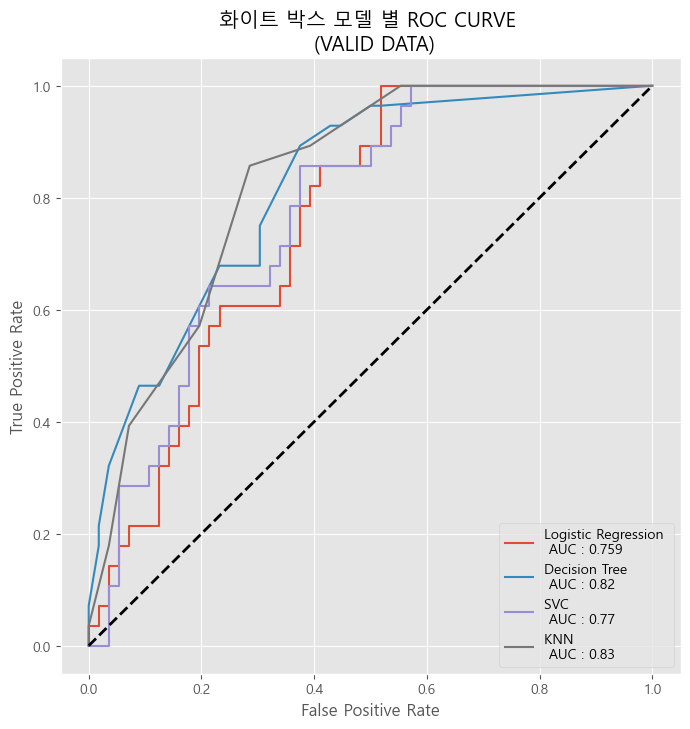

In [618]:
avg_roc_curve(models,x_valid,y_valid, 'VALID DATA')

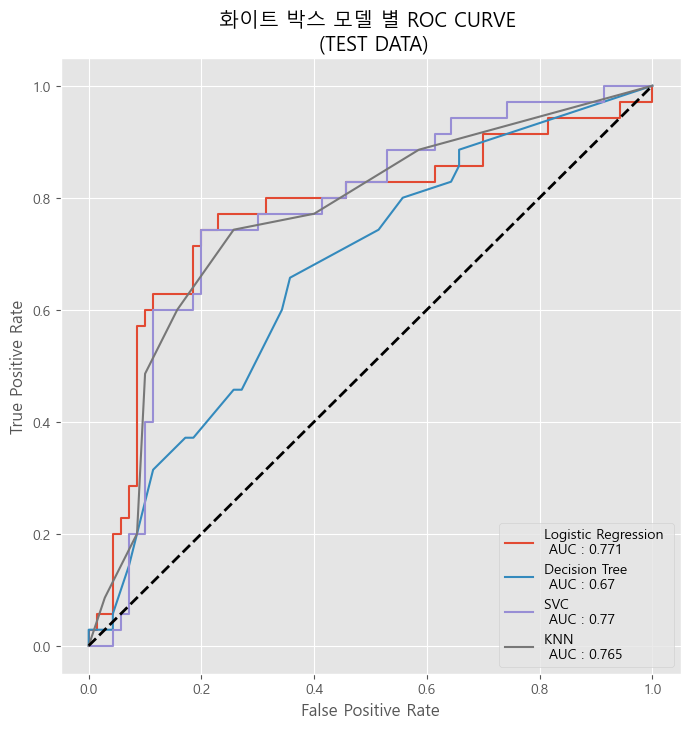

In [619]:
avg_roc_curve(models,x_test,y_test, 'TEST DATA')

### 화이트 박스 모델의 클래스 별 ROC CURVE

In [614]:
def roc_curve_plot(models,TEST_FEATURE,TEST_LABEL, ADD_TITLE):
    
    fig,ax = plt.subplots(ncols = len(models), figsize = (20,5))
    
    real = label_binarize(TEST_LABEL, classes = [0,1,2]) # 다중 범주 문제를 roc_curve 로 그리기 위해 encoding
                                                    # 각 클래스 별 ROC curve를 그리게 된다.
    n = 3 # classes 의 unqiue 한 갯수                                                
    
    
    for num,(name,model) in enumerate(models.items()):
        
        if name == 'SVC':
            
            model = CalibratedClassifierCV(model) #SVC는 predict_proba 를 제공하지 않으므로 상속시킨 모델을 만들자
            
            model.fit(x_train,y_train)
            
            prob = model.predict_proba(TEST_FEATURE)
            
            fpr = {}
            tpr = {}
            AUC = {}
            labels = {0:'CN',1:'MCI',2:'Dem'}
            
            for i in range(n):
                
                fpr[i],tpr[i],_ = roc_curve(real[:,i], prob[:,i])
                
                AUC[i] = round(auc(fpr[i],tpr[i]),2)
                
                ax[num].plot(fpr[i],tpr[i], label = f'{labels[i]} \n AUC : {AUC[i]}')
                
                ax[num].plot([0,1],[0,1], ls = '--', c = 'k', lw = '0.5')
                ax[num].set_title(name)
                ax[num].legend(loc = 'lower right')
                
                
            
        else:
                        
            prob = model.predict_proba(TEST_FEATURE)
            
            fpr = {}
            tpr = {}
            AUC = {}
            labels = {0:'CN',1:'MCI',2:'Dem'}
            
            for i in range(n):
                
                fpr[i],tpr[i],_ = roc_curve(real[:,i], prob[:,i])
                
                AUC[i] = round(auc(fpr[i],tpr[i]),2)
                
                ax[num].plot(fpr[i],tpr[i], label = f'{labels[i]} \n AUC : {AUC[i]}')
                
        
        ax[num].plot([0,1],[0,1], ls = '--', c = 'k', lw = '0.5')
        ax[num].legend(loc = 'lower right')
        ax[num].set_title(f'{name}의 class 별 ROC curve\n ({ADD_TITLE})')
        ax[num].set_xlabel('False Positive Rate')
        ax[num].set_ylabel('True Positive Rate')
        

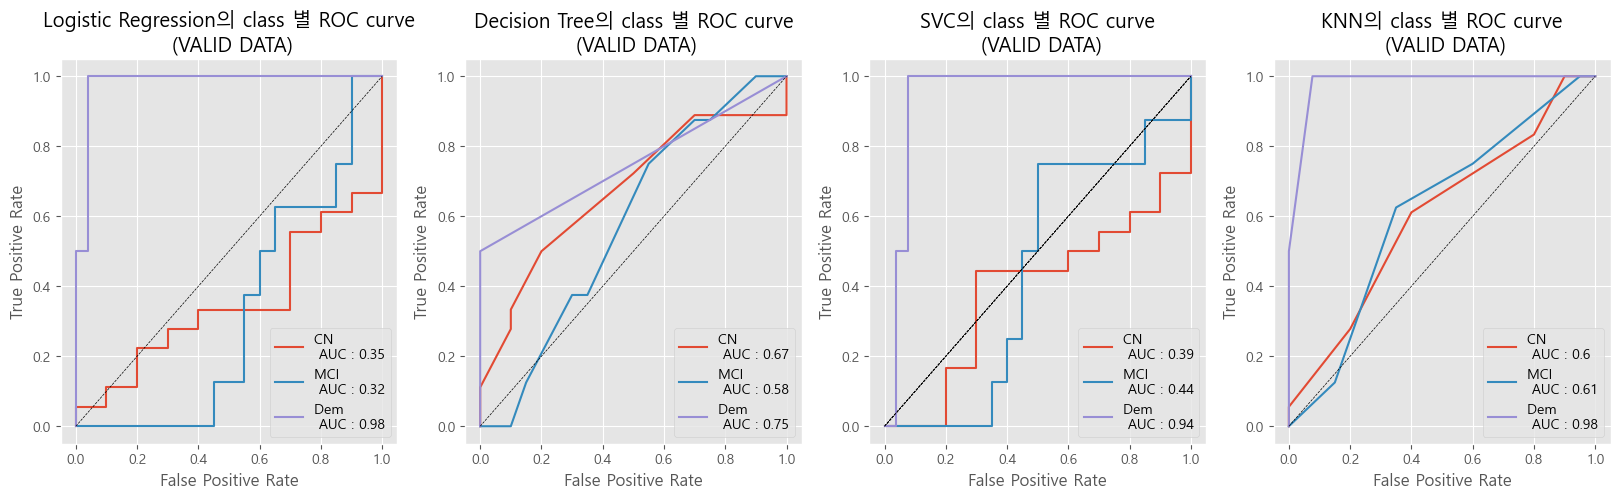

In [615]:
roc_curve_plot(models,x_valid,y_valid,'VALID DATA')

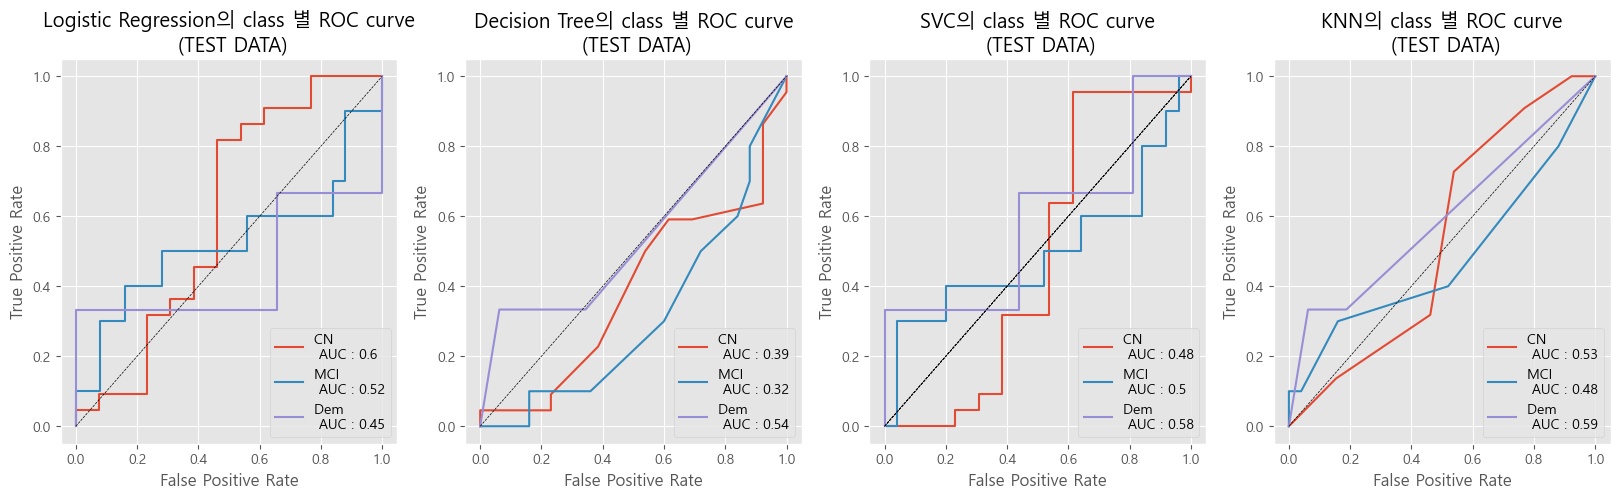

In [616]:
roc_curve_plot(models,x_test,y_test,'TEST DATA')